# Analysis of COVID-19 Data from The New York Times

*Author: Mark Bauer*  
*Date: March 28, 2020*

The New York Times Github Data [Repository](https://github.com/nytimes/covid-19-data).   
The New York Time [News Article](https://www.nytimes.com/article/coronavirus-county-data-us.html).  
The New York Times COVID-19 US Map: https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html.   
The New York Times COVID-19 Global Map: https://www.nytimes.com/interactive/2020/world/coronavirus-maps.html.

In [1]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
import seaborn as sns
import geopandas as gpd
import zipfile
from zipfile import ZipFile
from io import BytesIO
import os
import zipfile
from zipfile import ZipFile
from os.path import basename
import requests
import urllib
import squarify  

# to Plot matplotlib figures inline on the notebook
%matplotlib inline
sns.set(color_codes=True)

In [2]:
#Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,matplotlib.pyplot,seaborn

CPython 3.7.1
IPython 7.2.0

numpy 1.16.1
pandas 1.0.0
matplotlib 3.0.2
matplotlib.pyplot 3.0.2
seaborn 0.9.0


In [3]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'

covid_19_state_data = pd.read_csv(url)

In [4]:
covid_19_state_data.head(10)

date       state  fips  cases  deaths
0  2020-01-21  Washington    53      1       0
1  2020-01-22  Washington    53      1       0
2  2020-01-23  Washington    53      1       0
3  2020-01-24    Illinois    17      1       0
4  2020-01-24  Washington    53      1       0
5  2020-01-25  California     6      1       0
6  2020-01-25    Illinois    17      1       0
7  2020-01-25  Washington    53      1       0
8  2020-01-26     Arizona     4      1       0
9  2020-01-26  California     6      2       0

In [5]:
table = covid_19_state_data.sort_values(by=['date', 'cases'], 
                                ascending=[False, False]).drop_duplicates(subset ="state", 
                                keep = 'first').reset_index(drop=True).head(10)

table['cases'] = table['cases'].map('{:,}'.format)
table['deaths'] = table['deaths'].map('{:,}'.format)
table.drop('fips', axis=1, inplace=True)
                 
print(table.to_markdown())

|    | date       | state         | cases   | deaths   |
|---:|:-----------|:--------------|:--------|:---------|
|  0 | 2020-04-17 | New York      | 229,642 | 12,822   |
|  1 | 2020-04-17 | New Jersey    | 78,467  | 3,840    |
|  2 | 2020-04-17 | Massachusetts | 34,402  | 1,404    |
|  3 | 2020-04-17 | Pennsylvania  | 30,121  | 1,027    |
|  4 | 2020-04-17 | Michigan      | 29,952  | 2,226    |
|  5 | 2020-04-17 | California    | 29,398  | 1,050    |
|  6 | 2020-04-17 | Illinois      | 27,575  | 1,142    |
|  7 | 2020-04-17 | Florida       | 24,745  | 726      |
|  8 | 2020-04-17 | Louisiana     | 23,118  | 1,213    |
|  9 | 2020-04-17 | Texas         | 18,130  | 461      |


In [6]:
covid_19_state_data.shape

(2553, 5)

In [7]:
print('New York Times COVID-19 data as of', covid_19_state_data.sort_values(by='date', 
                                   ascending=False)['date'].iloc[0])

New York Times COVID-19 data as of 2020-04-17


In [8]:
current_date = covid_19_state_data.sort_values(by='date', ascending=False)['date'].iloc[0]

In [9]:
print('The current date of this notebook is', current_date)

The current date of this notebook is 2020-04-17


In [10]:
covid_19_state_data.date = pd.to_datetime(covid_19_state_data.date, infer_datetime_format=True)

In [11]:
covid_19_state_data.dtypes

date      datetime64[ns]
state             object
fips               int64
cases              int64
deaths             int64
dtype: object

In [12]:
covid_19_state_data.head()

date       state  fips  cases  deaths
0 2020-01-21  Washington    53      1       0
1 2020-01-22  Washington    53      1       0
2 2020-01-23  Washington    53      1       0
3 2020-01-24    Illinois    17      1       0
4 2020-01-24  Washington    53      1       0

In [13]:
epi_curve = covid_19_state_data.sort_values(by='date')

In [14]:
epi_curve = epi_curve.groupby(by='date')['cases'].sum().reset_index()

In [15]:
epi_curve['NewDate'] = epi_curve.date.dt.strftime("%m-%d")

In [16]:
epi_curve

date   cases NewDate
0  2020-01-21       1   01-21
1  2020-01-22       1   01-22
2  2020-01-23       1   01-23
3  2020-01-24       2   01-24
4  2020-01-25       3   01-25
..        ...     ...     ...
83 2020-04-13  580850   04-13
84 2020-04-14  607285   04-14
85 2020-04-15  637053   04-15
86 2020-04-16  668531   04-16
87 2020-04-17  699852   04-17

[88 rows x 3 columns]

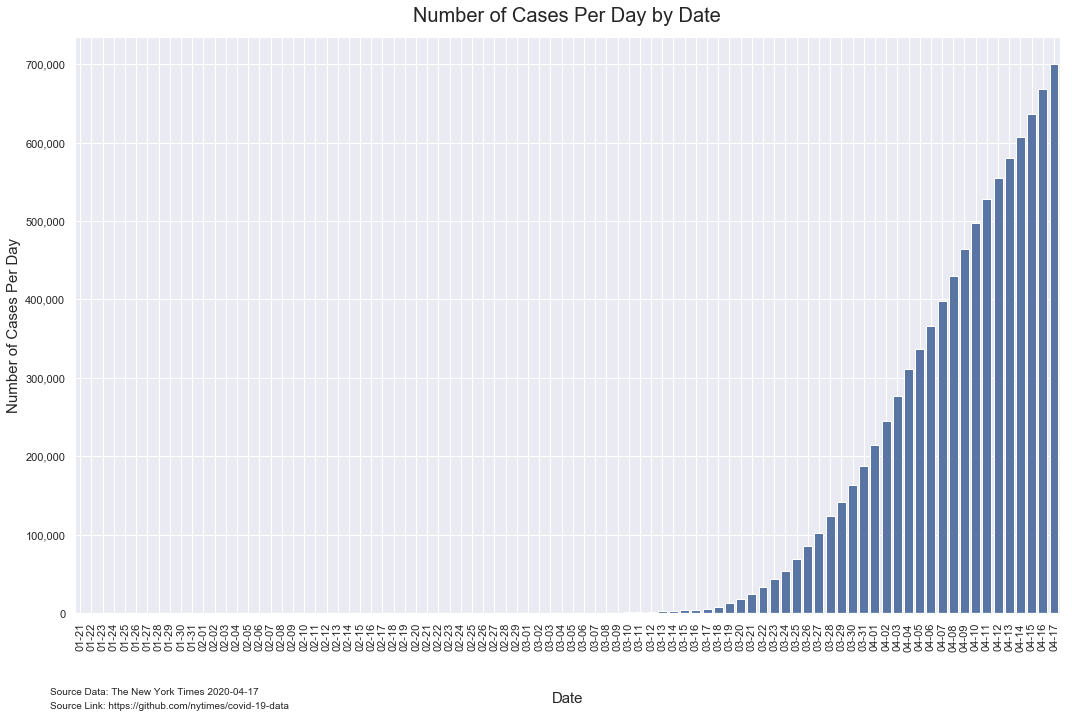

In [17]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.barplot(x="NewDate", 
            y="cases",
            color="C0",
            data=epi_curve)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 40

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.xticks(rotation=90)

#ax1.legend_.remove()
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of Cases Per Day', fontsize=15)
plt.title('Number of Cases Per Day by Date', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()

In [18]:
epi_curve['3_day_rolling_average'] = epi_curve.cases.rolling(3).mean()

In [19]:
epi_curve

date   cases NewDate  3_day_rolling_average
0  2020-01-21       1   01-21                    NaN
1  2020-01-22       1   01-22                    NaN
2  2020-01-23       1   01-23               1.000000
3  2020-01-24       2   01-24               1.333333
4  2020-01-25       3   01-25               2.000000
..        ...     ...     ...                    ...
83 2020-04-13  580850   04-13          554856.666667
84 2020-04-14  607285   04-14          581153.333333
85 2020-04-15  637053   04-15          608396.000000
86 2020-04-16  668531   04-16          637623.000000
87 2020-04-17  699852   04-17          668478.666667

[88 rows x 4 columns]

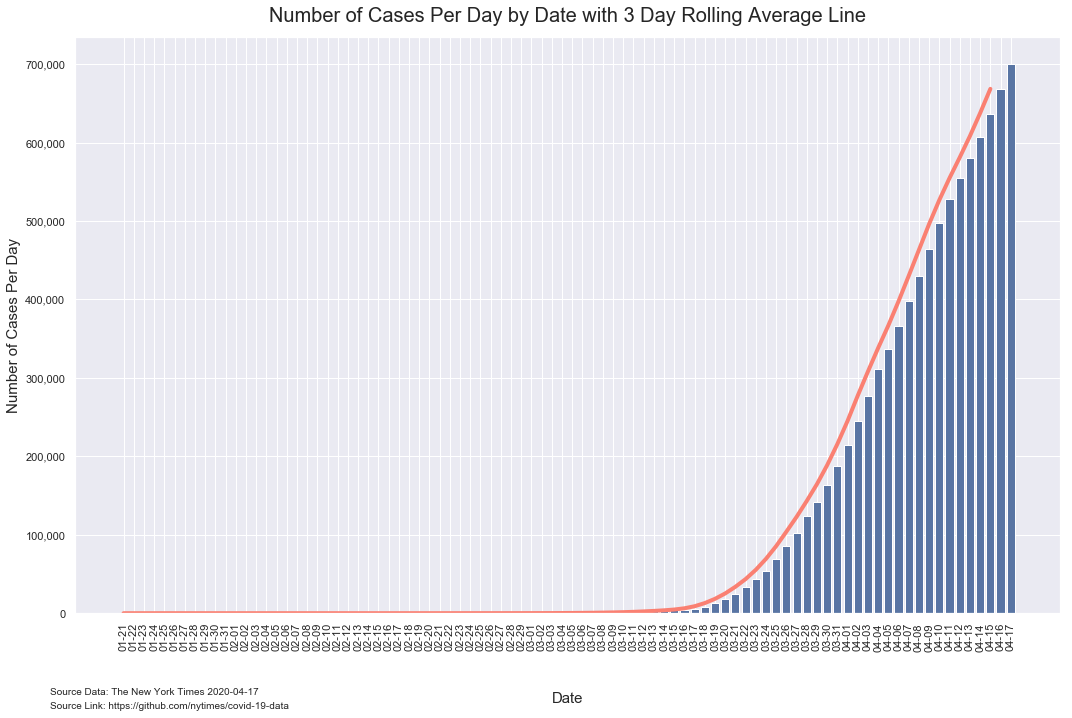

In [20]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.barplot(x="NewDate", 
            y="cases",
            color="C0",
            data=epi_curve)

sns.lineplot(x="NewDate", 
            y="3_day_rolling_average",
            color="salmon",
            data=epi_curve, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('D'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 40

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.xticks(rotation=90)

ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of Cases Per Day', fontsize=15)
plt.title('Number of Cases Per Day by Date with 3 Day Rolling Average Line', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/epi_curve')

In [21]:
drop_duplicates = covid_19_state_data.sort_values(by="cases", ascending=False).drop_duplicates(
                                                    subset ="state", keep = 'first')
top_10 = drop_duplicates[0:10]
top10_list = list(top_10.state)
top_10  = covid_19_state_data.loc[covid_19_state_data['state'].isin(top10_list)]

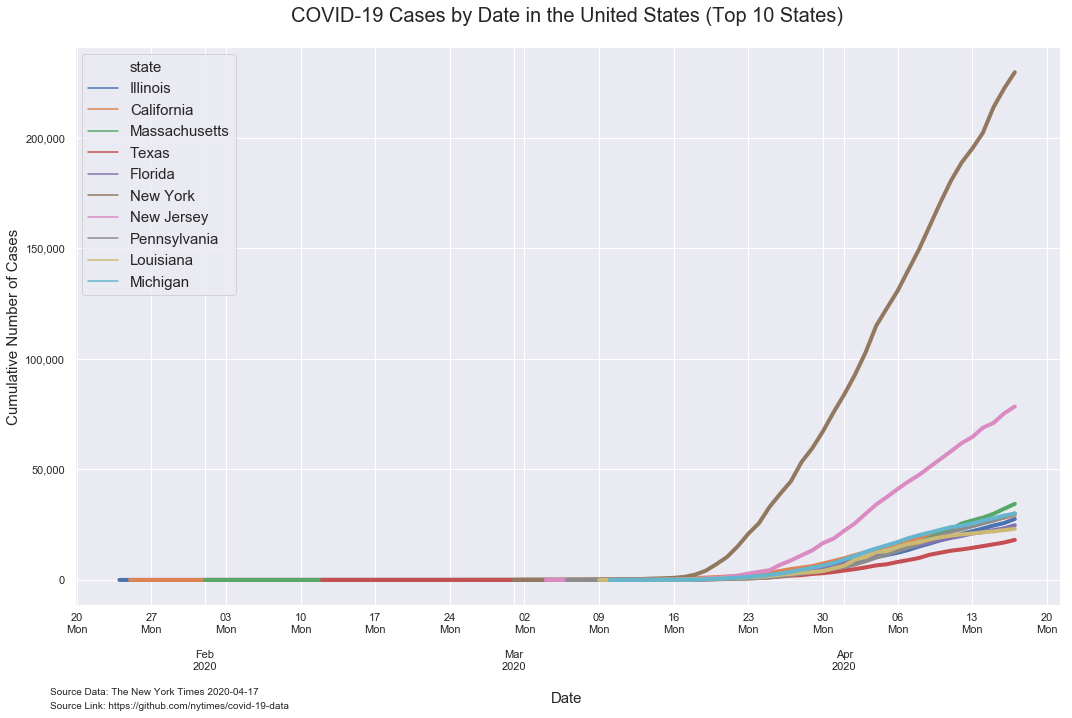

In [22]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="date", y="cases",
             hue="state",
             data=top_10, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Cases', fontsize=15)
plt.title('COVID-19 Cases by Date in the United States (Top 10 States)', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries')

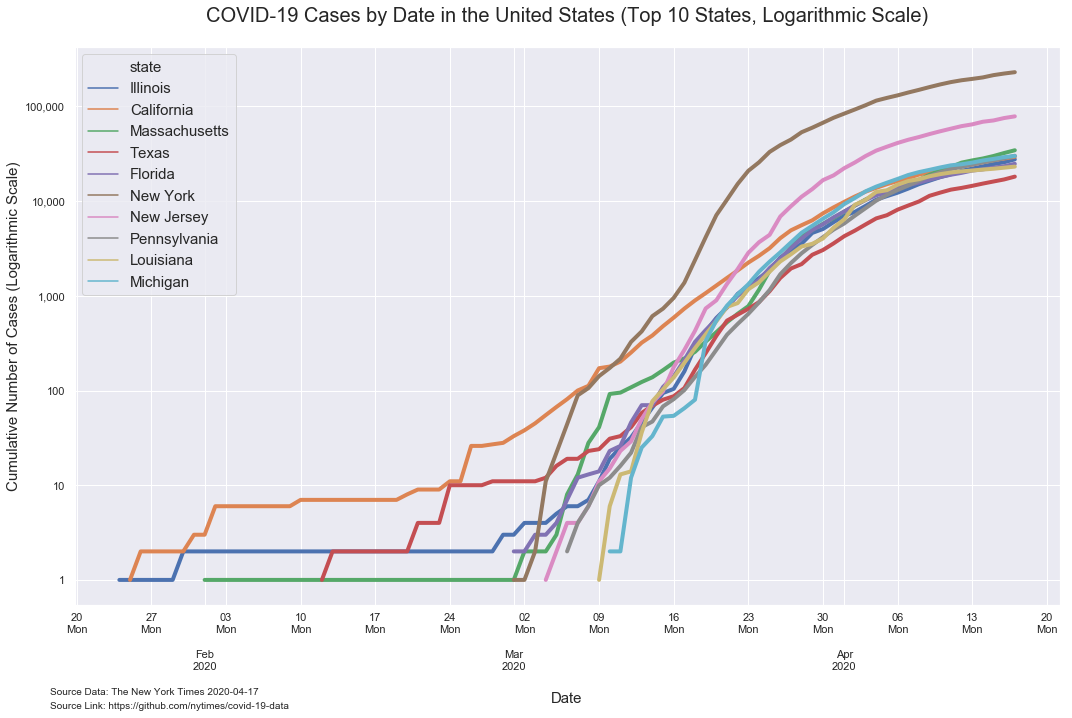

In [23]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="date", y="cases",
             hue="state",
             data=top_10, linewidth=4)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Cases (Logarithmic Scale)', fontsize=15)
plt.title('COVID-19 Cases by Date in the United States (Top 10 States, Logarithmic Scale)', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-log')

# Date to 10 Cases

In [24]:
state_ten_cases = top_10.loc[top_10.cases >= 10]

In [25]:
state_ten_cases = state_ten_cases.sort_values(by=['date', 'cases'], 
                                              ascending=[True, True]).drop_duplicates(subset ="state", 
                                                                                      keep = 'first').reset_index(drop=True)

In [26]:
state_ten_cases = state_ten_cases[['date', 'state']]
state_ten_cases.rename(columns={'date': 'date_ten_case'}, inplace=True)

In [27]:
state_ten_cases

date_ten_case          state
0    2020-02-24          Texas
1    2020-02-24     California
2    2020-03-04       New York
3    2020-03-07        Florida
4    2020-03-07  Massachusetts
5    2020-03-09   Pennsylvania
6    2020-03-09       Illinois
7    2020-03-09     New Jersey
8    2020-03-11      Louisiana
9    2020-03-12       Michigan

In [28]:
state_ten_cases = top_10.merge(state_ten_cases, left_on='state', right_on='state')

In [29]:
state_ten_cases

date     state  fips  cases  deaths date_ten_case
0   2020-01-24  Illinois    17      1       0    2020-03-09
1   2020-01-25  Illinois    17      1       0    2020-03-09
2   2020-01-26  Illinois    17      1       0    2020-03-09
3   2020-01-27  Illinois    17      1       0    2020-03-09
4   2020-01-28  Illinois    17      1       0    2020-03-09
..         ...       ...   ...    ...     ...           ...
570 2020-04-13  Michigan    26  25487    1601    2020-03-12
571 2020-04-14  Michigan    26  26844    1766    2020-03-12
572 2020-04-15  Michigan    26  27893    1919    2020-03-12
573 2020-04-16  Michigan    26  29119    2091    2020-03-12
574 2020-04-17  Michigan    26  29952    2226    2020-03-12

[575 rows x 6 columns]

In [30]:
state_ten_cases = state_ten_cases.loc[state_ten_cases.cases >= 10]

In [31]:
state_ten_cases

date     state  fips  cases  deaths date_ten_case
45  2020-03-09  Illinois    17     11       0    2020-03-09
46  2020-03-10  Illinois    17     19       0    2020-03-09
47  2020-03-11  Illinois    17     25       0    2020-03-09
48  2020-03-12  Illinois    17     32       0    2020-03-09
49  2020-03-13  Illinois    17     46       0    2020-03-09
..         ...       ...   ...    ...     ...           ...
570 2020-04-13  Michigan    26  25487    1601    2020-03-12
571 2020-04-14  Michigan    26  26844    1766    2020-03-12
572 2020-04-15  Michigan    26  27893    1919    2020-03-12
573 2020-04-16  Michigan    26  29119    2091    2020-03-12
574 2020-04-17  Michigan    26  29952    2226    2020-03-12

[432 rows x 6 columns]

In [32]:
state_ten_cases['days_since_ten_case'] = (state_ten_cases['date'] - 
                                      state_ten_cases['date_ten_case']).dt.days

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
state_ten_cases

date     state  fips  cases  deaths date_ten_case  \
45  2020-03-09  Illinois    17     11       0    2020-03-09   
46  2020-03-10  Illinois    17     19       0    2020-03-09   
47  2020-03-11  Illinois    17     25       0    2020-03-09   
48  2020-03-12  Illinois    17     32       0    2020-03-09   
49  2020-03-13  Illinois    17     46       0    2020-03-09   
..         ...       ...   ...    ...     ...           ...   
570 2020-04-13  Michigan    26  25487    1601    2020-03-12   
571 2020-04-14  Michigan    26  26844    1766    2020-03-12   
572 2020-04-15  Michigan    26  27893    1919    2020-03-12   
573 2020-04-16  Michigan    26  29119    2091    2020-03-12   
574 2020-04-17  Michigan    26  29952    2226    2020-03-12   

     days_since_ten_case  
45                     0  
46                     1  
47                     2  
48                     3  
49                     4  
..                   ...  
570                   32  
571                   33  
572                   34  
573                   35  
574                   36  

[432 rows x 7 columns]

# Daily Number of Cases Since 10th Case

In [34]:
state_ten_cases['daily_cases'] = (state_ten_cases.cases -
                                state_ten_cases.cases.shift(1))

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
state_ten_cases[:50]

date       state  fips  cases  deaths date_ten_case  \
45  2020-03-09    Illinois    17     11       0    2020-03-09   
46  2020-03-10    Illinois    17     19       0    2020-03-09   
47  2020-03-11    Illinois    17     25       0    2020-03-09   
48  2020-03-12    Illinois    17     32       0    2020-03-09   
49  2020-03-13    Illinois    17     46       0    2020-03-09   
50  2020-03-14    Illinois    17     66       0    2020-03-09   
51  2020-03-15    Illinois    17     94       0    2020-03-09   
52  2020-03-16    Illinois    17    104       0    2020-03-09   
53  2020-03-17    Illinois    17    159       1    2020-03-09   
54  2020-03-18    Illinois    17    286       1    2020-03-09   
55  2020-03-19    Illinois    17    420       4    2020-03-09   
56  2020-03-20    Illinois    17    583       5    2020-03-09   
57  2020-03-21    Illinois    17    751       6    2020-03-09   
58  2020-03-22    Illinois    17   1047       9    2020-03-09   
59  2020-03-23    Illinois    17   1285      12    2020-03-09   
60  2020-03-24    Illinois    17   1535      16    2020-03-09   
61  2020-03-25    Illinois    17   1875      21    2020-03-09   
62  2020-03-26    Illinois    17   2538      26    2020-03-09   
63  2020-03-27    Illinois    17   3029      37    2020-03-09   
64  2020-03-28    Illinois    17   3547      50    2020-03-09   
65  2020-03-29    Illinois    17   4613      70    2020-03-09   
66  2020-03-30    Illinois    17   5070      84    2020-03-09   
67  2020-03-31    Illinois    17   5994     107    2020-03-09   
68  2020-04-01    Illinois    17   6980     146    2020-03-09   
69  2020-04-02    Illinois    17   7695     165    2020-03-09   
70  2020-04-03    Illinois    17   8904     211    2020-03-09   
71  2020-04-04    Illinois    17  10357     248    2020-03-09   
72  2020-04-05    Illinois    17  11276     282    2020-03-09   
73  2020-04-06    Illinois    17  12262     309    2020-03-09   
74  2020-04-07    Illinois    17  13549     384    2020-03-09   
75  2020-04-08    Illinois    17  15078     464    2020-03-09   
76  2020-04-09    Illinois    17  16422     534    2020-03-09   
77  2020-04-10    Illinois    17  17887     607    2020-03-09   
78  2020-04-11    Illinois    17  19180     682    2020-03-09   
79  2020-04-12    Illinois    17  20852     727    2020-03-09   
80  2020-04-13    Illinois    17  22025     800    2020-03-09   
81  2020-04-14    Illinois    17  23247     878    2020-03-09   
82  2020-04-15    Illinois    17  24593     958    2020-03-09   
83  2020-04-16    Illinois    17  25734    1081    2020-03-09   
84  2020-04-17    Illinois    17  27575    1142    2020-03-09   
115 2020-02-24  California     6     11       0    2020-02-24   
116 2020-02-25  California     6     11       0    2020-02-24   
117 2020-02-26  California     6     26       0    2020-02-24   
118 2020-02-27  California     6     26       0    2020-02-24   
119 2020-02-28  California     6     27       0    2020-02-24   
120 2020-02-29  California     6     28       0    2020-02-24   
121 2020-03-01  California     6     33       0    2020-02-24   
122 2020-03-02  California     6     38       0    2020-02-24   
123 2020-03-03  California     6     45       0    2020-02-24   
124 2020-03-04  California     6     55       1    2020-02-24   

     days_since_ten_case  daily_cases  
45                     0          NaN  
46                     1          8.0  
47                     2          6.0  
48                     3          7.0  
49                     4         14.0  
50                     5         20.0  
51                     6         28.0  
52                     7         10.0  
53                     8         55.0  
54                     9        127.0  
55                    10        134.0  
56                    11        163.0  
57                    12        168.0  
58                    13        296.0  
59                    14        238.0  
60                    15        250.0  
61            

In [36]:
state_ten_cases.columns

Index(['date', 'state', 'fips', 'cases', 'deaths', 'date_ten_case',
       'days_since_ten_case', 'daily_cases'],
      dtype='object')

In [37]:
state_ten_cases = state_ten_cases[['date', 'state', 'cases',  
                                   'daily_cases', 'deaths', 'date_ten_case','days_since_ten_case']]

In [38]:
state_ten_cases[250:300]

date       state   cases  daily_cases  deaths date_ten_case  \
381 2020-03-22    New York   15168       4812.0     122    2020-03-04   
382 2020-03-23    New York   20875       5707.0     159    2020-03-04   
383 2020-03-24    New York   25665       4790.0     218    2020-03-04   
384 2020-03-25    New York   33066       7401.0     325    2020-03-04   
385 2020-03-26    New York   38987       5921.0     432    2020-03-04   
386 2020-03-27    New York   44635       5648.0     535    2020-03-04   
387 2020-03-28    New York   53363       8728.0     782    2020-03-04   
388 2020-03-29    New York   59568       6205.0     965    2020-03-04   
389 2020-03-30    New York   67174       7606.0    1224    2020-03-04   
390 2020-03-31    New York   75832       8658.0    1550    2020-03-04   
391 2020-04-01    New York   83889       8057.0    1941    2020-03-04   
392 2020-04-02    New York   92770       8881.0    2653    2020-03-04   
393 2020-04-03    New York  102870      10100.0    2935    2020-03-04   
394 2020-04-04    New York  114996      12126.0    3568    2020-03-04   
395 2020-04-05    New York  122911       7915.0    4161    2020-03-04   
396 2020-04-06    New York  130703       7792.0    4758    2020-03-04   
397 2020-04-07    New York  140081       9378.0    5563    2020-03-04   
398 2020-04-08    New York  149401       9320.0    6268    2020-03-04   
399 2020-04-09    New York  159937      10536.0    7067    2020-03-04   
400 2020-04-10    New York  170512      10575.0    7844    2020-03-04   
401 2020-04-11    New York  180458       9946.0    8627    2020-03-04   
402 2020-04-12    New York  188694       8236.0    9385    2020-03-04   
403 2020-04-13    New York  195031       6337.0   10056    2020-03-04   
404 2020-04-14    New York  202208       7177.0   10834    2020-03-04   
405 2020-04-15    New York  213779      11571.0   11586    2020-03-04   
406 2020-04-16    New York  222284       8505.0   12192    2020-03-04   
407 2020-04-17    New York  229642       7358.0   12822    2020-03-04   
413 2020-03-09  New Jersey      11    -229631.0       0    2020-03-09   
414 2020-03-10  New Jersey      15          4.0       1    2020-03-09   
415 2020-03-11  New Jersey      23          8.0       1    2020-03-09   
416 2020-03-12  New Jersey      29          6.0       1    2020-03-09   
417 2020-03-13  New Jersey      50         21.0       1    2020-03-09   
418 2020-03-14  New Jersey      75         25.0       2    2020-03-09   
419 2020-03-15  New Jersey      98         23.0       2    2020-03-09   
420 2020-03-16  New Jersey     176         78.0       3    2020-03-09   
421 2020-03-17  New Jersey     268         92.0       3    2020-03-09   
422 2020-03-18  New Jersey     427        159.0       5    2020-03-09   
423 2020-03-19  New Jersey     735        308.0       9    2020-03-09   
424 2020-03-20  New Jersey     896        161.0      11    2020-03-09   
425 2020-03-21  New Jersey    1336        440.0      16    2020-03-09   
426 2020-03-22  New Jersey    1914        578.0      20    2020-03-09   
427 2020-03-23  New Jersey    2844        930.0      27    2020-03-09   
428 2020-03-24  New Jersey    3675        831.0      44    2020-03-09   
429 2020-03-25  New Jersey    4402        727.0      62    2020-03-09   
430 2020-03-26  New Jersey    6876       2474.0      81    2020-03-09   
431 2020-03-27  New Jersey    8825       1949.0     108    2020-03-09   
432 2020-03-28  New Jersey   11124       2299.0     140    2020-03-09   
433 2020-03-29  New Jersey   13386       2262.0     161    2020-03-09   
434 2020-03-30  New Jersey   16636       3250.0     199    2020-03-09   
435 2020-03-31  New Jersey   18696       2060.0     267    2020-03-09   

     days_since_ten_case  
381                   18  
382                   19  
383                   20  
384                   21  
385                   22  
386                   23  
387                   24  
388                   25  
389                   26  
390             

In [39]:
state_ten_cases['daily_cases'].loc[state_ten_cases.daily_cases < 0] = state_ten_cases['cases'] - 10

/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
state_ten_cases['daily_cases'].loc[state_ten_cases.daily_cases.isnull()] = state_ten_cases['cases'] - 10

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
state_ten_cases[:50]

date       state  cases  daily_cases  deaths date_ten_case  \
45  2020-03-09    Illinois     11          1.0       0    2020-03-09   
46  2020-03-10    Illinois     19          8.0       0    2020-03-09   
47  2020-03-11    Illinois     25          6.0       0    2020-03-09   
48  2020-03-12    Illinois     32          7.0       0    2020-03-09   
49  2020-03-13    Illinois     46         14.0       0    2020-03-09   
50  2020-03-14    Illinois     66         20.0       0    2020-03-09   
51  2020-03-15    Illinois     94         28.0       0    2020-03-09   
52  2020-03-16    Illinois    104         10.0       0    2020-03-09   
53  2020-03-17    Illinois    159         55.0       1    2020-03-09   
54  2020-03-18    Illinois    286        127.0       1    2020-03-09   
55  2020-03-19    Illinois    420        134.0       4    2020-03-09   
56  2020-03-20    Illinois    583        163.0       5    2020-03-09   
57  2020-03-21    Illinois    751        168.0       6    2020-03-09   
58  2020-03-22    Illinois   1047        296.0       9    2020-03-09   
59  2020-03-23    Illinois   1285        238.0      12    2020-03-09   
60  2020-03-24    Illinois   1535        250.0      16    2020-03-09   
61  2020-03-25    Illinois   1875        340.0      21    2020-03-09   
62  2020-03-26    Illinois   2538        663.0      26    2020-03-09   
63  2020-03-27    Illinois   3029        491.0      37    2020-03-09   
64  2020-03-28    Illinois   3547        518.0      50    2020-03-09   
65  2020-03-29    Illinois   4613       1066.0      70    2020-03-09   
66  2020-03-30    Illinois   5070        457.0      84    2020-03-09   
67  2020-03-31    Illinois   5994        924.0     107    2020-03-09   
68  2020-04-01    Illinois   6980        986.0     146    2020-03-09   
69  2020-04-02    Illinois   7695        715.0     165    2020-03-09   
70  2020-04-03    Illinois   8904       1209.0     211    2020-03-09   
71  2020-04-04    Illinois  10357       1453.0     248    2020-03-09   
72  2020-04-05    Illinois  11276        919.0     282    2020-03-09   
73  2020-04-06    Illinois  12262        986.0     309    2020-03-09   
74  2020-04-07    Illinois  13549       1287.0     384    2020-03-09   
75  2020-04-08    Illinois  15078       1529.0     464    2020-03-09   
76  2020-04-09    Illinois  16422       1344.0     534    2020-03-09   
77  2020-04-10    Illinois  17887       1465.0     607    2020-03-09   
78  2020-04-11    Illinois  19180       1293.0     682    2020-03-09   
79  2020-04-12    Illinois  20852       1672.0     727    2020-03-09   
80  2020-04-13    Illinois  22025       1173.0     800    2020-03-09   
81  2020-04-14    Illinois  23247       1222.0     878    2020-03-09   
82  2020-04-15    Illinois  24593       1346.0     958    2020-03-09   
83  2020-04-16    Illinois  25734       1141.0    1081    2020-03-09   
84  2020-04-17    Illinois  27575       1841.0    1142    2020-03-09   
115 2020-02-24  California     11          1.0       0    2020-02-24   
116 2020-02-25  California     11          0.0       0    2020-02-24   
117 2020-02-26  California     26         15.0       0    2020-02-24   
118 2020-02-27  California     26          0.0       0    2020-02-24   
119 2020-02-28  California     27          1.0       0    2020-02-24   
120 2020-02-29  California     28          1.0       0    2020-02-24   
121 2020-03-01  California     33          5.0       0    2020-02-24   
122 2020-03-02  California     38          5.0       0    2020-02-24   
123 2020-03-03  California     45          7.0       0    2020-02-24   
124 2020-03-04  California     55         10.0       1    2020-02-24   

     days_since_ten_case  
45                     0  
46                     1  
47                     2  
48                     3  
49                     4  
50                     5  
51                     6  
52                     7  
53                     8  
54                     9  
55                    10  
56           

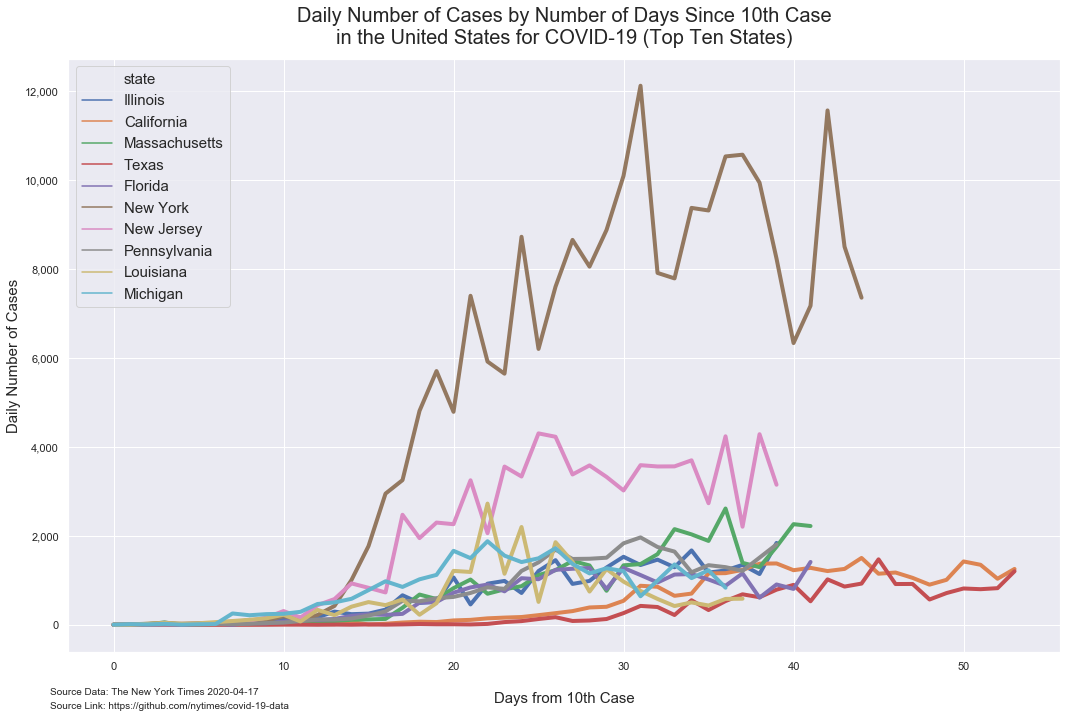

In [42]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_since_ten_case", y="daily_cases",
             hue="state",
             data=state_ten_cases, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Daily Number of Cases', fontsize=15)
plt.title('Daily Number of Cases by Number of Days Since 10th Case\nin the United States for COVID-19 (Top Ten States)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-state-top-10-daily')

In [43]:
state_ten_cases['daily_cases'].loc[state_ten_cases.daily_cases == 0]

116    0.0
118    0.0
258    0.0
259    0.0
260    0.0
261    0.0
263    0.0
264    0.0
265    0.0
266    0.0
270    0.0
325    0.0
456    0.0
Name: daily_cases, dtype: float64

In [44]:
temp_fill_zeros = state_ten_cases.sort_values(by=['state', 'date','cases'], 
                                                 ascending=[True, True, True])

temp_fill_zeros['daily_cases'].loc[state_ten_cases.daily_cases == 0] = 1

temp_fill_zeros

date       state  cases  daily_cases  deaths date_ten_case  \
115 2020-02-24  California     11          1.0       0    2020-02-24   
116 2020-02-25  California     11          1.0       0    2020-02-24   
117 2020-02-26  California     26         15.0       0    2020-02-24   
118 2020-02-27  California     26          1.0       0    2020-02-24   
119 2020-02-28  California     27          1.0       0    2020-02-24   
..         ...         ...    ...          ...     ...           ...   
307 2020-04-13       Texas  14487        713.0     320    2020-02-24   
308 2020-04-14       Texas  15303        816.0     365    2020-02-24   
309 2020-04-15       Texas  16103        800.0     395    2020-02-24   
310 2020-04-16       Texas  16926        823.0     428    2020-02-24   
311 2020-04-17       Texas  18130       1204.0     461    2020-02-24   

     days_since_ten_case  
115                    0  
116                    1  
117                    2  
118                    3  
119                    4  
..                   ...  
307                   49  
308                   50  
309                   51  
310                   52  
311                   53  

[432 rows x 7 columns]

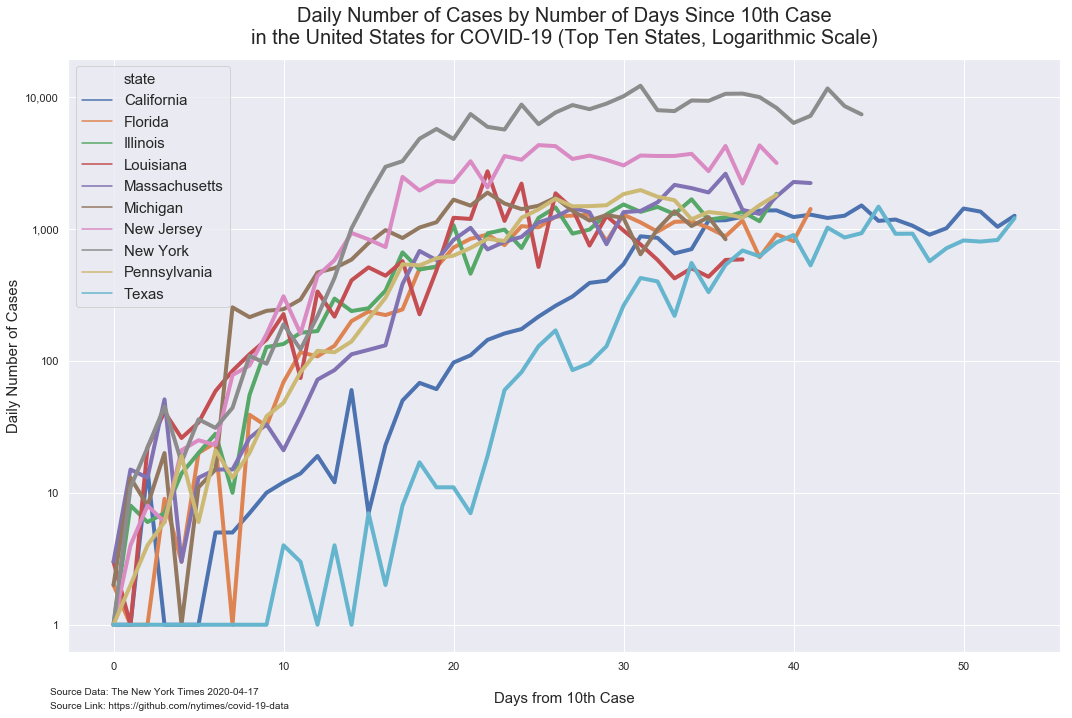

In [45]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
sns.lineplot(x="days_since_ten_case", y="daily_cases",
             hue="state",
             data=temp_fill_zeros, linewidth=4)

ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Daily Number of Cases', fontsize=15)
plt.title('Daily Number of Cases by Number of Days Since 10th Case\nin the United States for COVID-19 (Top Ten States, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-state-top-10-daily-log')

In [46]:
state_ten_cases['daily_cases'].loc[state_ten_cases.daily_cases == 0]

116    0.0
118    0.0
258    0.0
259    0.0
260    0.0
261    0.0
263    0.0
264    0.0
265    0.0
266    0.0
270    0.0
325    0.0
456    0.0
Name: daily_cases, dtype: float64

# Daily Number of Cases Since 10th Case (Weekly Average)

In [47]:
state_ten_cases_weekly = state_ten_cases.sort_values(by=['state', 'date','cases'], 
                                                    ascending=[True, True, True])

In [48]:
state_ten_cases_weekly[0:30]

date       state  cases  daily_cases  deaths date_ten_case  \
115 2020-02-24  California     11          1.0       0    2020-02-24   
116 2020-02-25  California     11          0.0       0    2020-02-24   
117 2020-02-26  California     26         15.0       0    2020-02-24   
118 2020-02-27  California     26          0.0       0    2020-02-24   
119 2020-02-28  California     27          1.0       0    2020-02-24   
120 2020-02-29  California     28          1.0       0    2020-02-24   
121 2020-03-01  California     33          5.0       0    2020-02-24   
122 2020-03-02  California     38          5.0       0    2020-02-24   
123 2020-03-03  California     45          7.0       0    2020-02-24   
124 2020-03-04  California     55         10.0       1    2020-02-24   
125 2020-03-05  California     67         12.0       1    2020-02-24   
126 2020-03-06  California     81         14.0       1    2020-02-24   
127 2020-03-07  California    100         19.0       1    2020-02-24   
128 2020-03-08  California    112         12.0       1    2020-02-24   
129 2020-03-09  California    172         60.0       2    2020-02-24   
130 2020-03-10  California    179          7.0       3    2020-02-24   
131 2020-03-11  California    202         23.0       4    2020-02-24   
132 2020-03-12  California    252         50.0       4    2020-02-24   
133 2020-03-13  California    320         68.0       5    2020-02-24   
134 2020-03-14  California    381         61.0       5    2020-02-24   
135 2020-03-15  California    478         97.0       6    2020-02-24   
136 2020-03-16  California    588        110.0      11    2020-02-24   
137 2020-03-17  California    732        144.0      14    2020-02-24   
138 2020-03-18  California    893        161.0      17    2020-02-24   
139 2020-03-19  California   1067        174.0      19    2020-02-24   
140 2020-03-20  California   1283        216.0      24    2020-02-24   
141 2020-03-21  California   1544        261.0      28    2020-02-24   
142 2020-03-22  California   1851        307.0      35    2020-02-24   
143 2020-03-23  California   2240        389.0      39    2020-02-24   
144 2020-03-24  California   2644        404.0      52    2020-02-24   

     days_since_ten_case  
115                    0  
116                    1  
117                    2  
118                    3  
119                    4  
120                    5  
121                    6  
122                    7  
123                    8  
124                    9  
125                   10  
126                   11  
127                   12  
128                   13  
129                   14  
130                   15  
131                   16  
132                   17  
133                   18  
134                   19  
135                   20  
136                   21  
137                   22  
138                   23  
139                   24  
140                   25  
141                   26  
142                   27  
143                   28  
144                   29

In [49]:
state_ten_cases_weekly = state_ten_cases_weekly.set_index('date').groupby('state').resample('W').agg({'days_since_ten_case': 
                                                                    np.max, 'daily_cases': np.mean})

In [50]:
state_ten_cases_weekly

days_since_ten_case  daily_cases
state      date                                        
California 2020-03-01                    6     3.285714
           2020-03-08                   13    11.285714
           2020-03-15                   20    52.285714
           2020-03-22                   27   196.142857
           2020-03-29                   34   630.714286
...                                    ...          ...
Texas      2020-03-22                   27    78.857143
           2020-03-29                   34   297.142857
           2020-04-05                   41   626.000000
           2020-04-12                   48   954.285714
           2020-04-19                   53   871.200000

[67 rows x 2 columns]

In [51]:
state_ten_cases_weekly.reset_index(inplace=True)
state_ten_cases_weekly.rename(columns={'daily_cases': 'daily_cases_week_average'}, inplace=True)

In [52]:
state_ten_cases_weekly

state       date  days_since_ten_case  daily_cases_week_average
0   California 2020-03-01                    6                  3.285714
1   California 2020-03-08                   13                 11.285714
2   California 2020-03-15                   20                 52.285714
3   California 2020-03-22                   27                196.142857
4   California 2020-03-29                   34                630.714286
..         ...        ...                  ...                       ...
62       Texas 2020-03-22                   27                 78.857143
63       Texas 2020-03-29                   34                297.142857
64       Texas 2020-04-05                   41                626.000000
65       Texas 2020-04-12                   48                954.285714
66       Texas 2020-04-19                   53                871.200000

[67 rows x 4 columns]

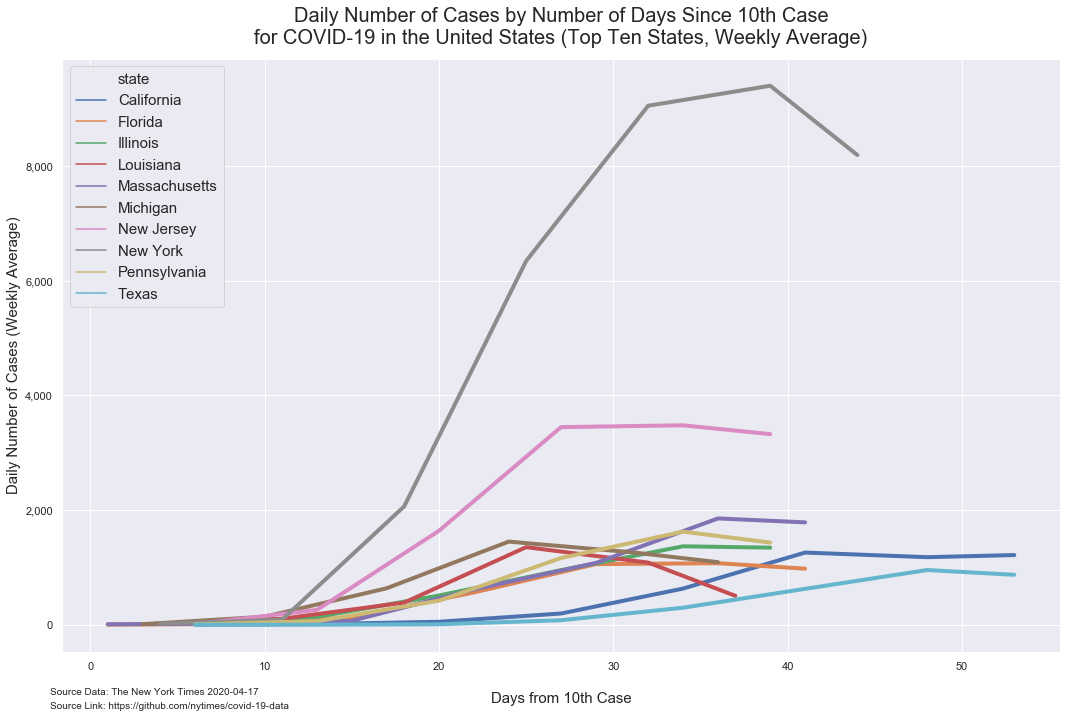

In [53]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
sns.lineplot(x="days_since_ten_case", y="daily_cases_week_average",
             hue="state",
             data=state_ten_cases_weekly, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Daily Number of Cases by Number of Days Since 10th Case\nfor COVID-19 in the United States (Top Ten States, Weekly Average)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-state-top-10-weekly')

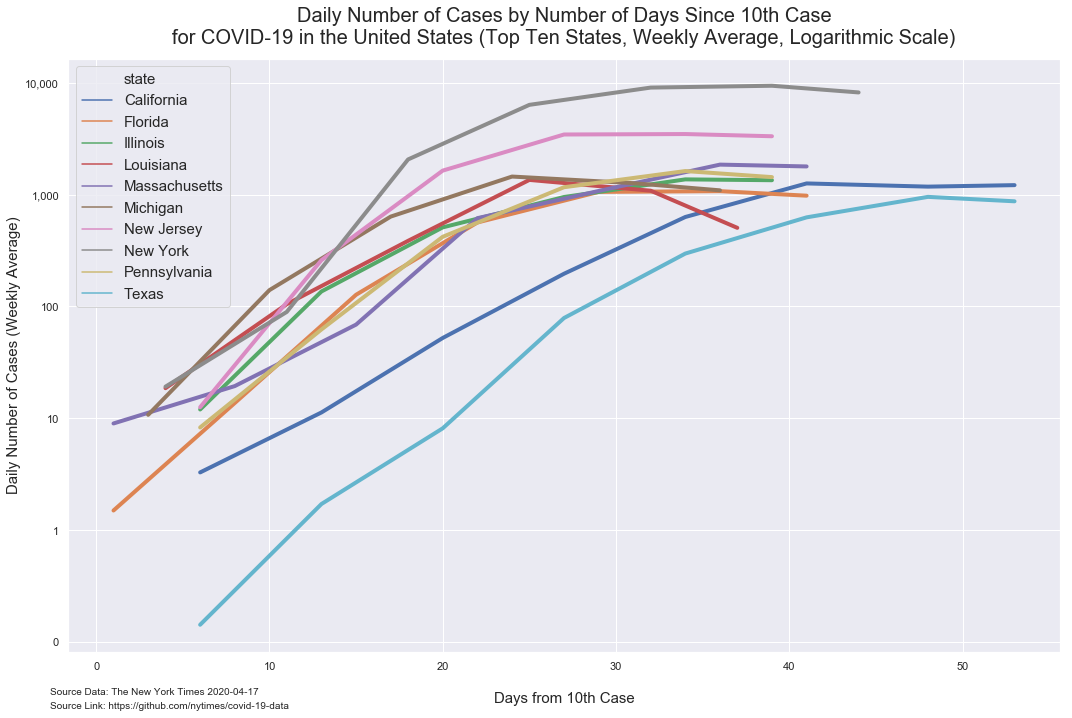

In [54]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_since_ten_case", y="daily_cases_week_average",
             hue="state",
             data=state_ten_cases_weekly, linewidth=4)

ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Daily Number of Cases by Number of Days Since 10th Case\nfor COVID-19 in the United States (Top Ten States, Weekly Average, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-state-top-10-weekly-log')

# Calculating Growth Rate = Cases Today / Cases the Previous Day

In [55]:
growth_rate = state_ten_cases.sort_values(by=['state', 'date', 'cases'], 
                                                ascending=[True, True, True])

In [56]:
growth_rate.head()

date       state  cases  daily_cases  deaths date_ten_case  \
115 2020-02-24  California     11          1.0       0    2020-02-24   
116 2020-02-25  California     11          0.0       0    2020-02-24   
117 2020-02-26  California     26         15.0       0    2020-02-24   
118 2020-02-27  California     26          0.0       0    2020-02-24   
119 2020-02-28  California     27          1.0       0    2020-02-24   

     days_since_ten_case  
115                    0  
116                    1  
117                    2  
118                    3  
119                    4

In [57]:
growth_rate['growth_rate'] = (growth_rate['daily_cases'] / growth_rate['daily_cases'].shift(1))

In [58]:
growth_rate[50:100]

date       state  cases  daily_cases  deaths date_ten_case  \
165 2020-04-14  California  25758       1424.0     778    2020-02-24   
166 2020-04-15  California  27107       1349.0     885    2020-02-24   
167 2020-04-16  California  28142       1035.0     971    2020-02-24   
168 2020-04-17  California  29398       1256.0    1050    2020-02-24   
318 2020-03-07     Florida     12          2.0       2    2020-03-07   
319 2020-03-08     Florida     13          1.0       2    2020-03-07   
320 2020-03-09     Florida     14          1.0       2    2020-03-07   
321 2020-03-10     Florida     23          9.0       2    2020-03-07   
322 2020-03-11     Florida     26          3.0       2    2020-03-07   
323 2020-03-12     Florida     46         20.0       2    2020-03-07   
324 2020-03-13     Florida     70         24.0       2    2020-03-07   
325 2020-03-14     Florida     70          0.0       3    2020-03-07   
326 2020-03-15     Florida    109         39.0       3    2020-03-07   
327 2020-03-16     Florida    141         32.0       4    2020-03-07   
328 2020-03-17     Florida    210         69.0       6    2020-03-07   
329 2020-03-18     Florida    326        116.0       7    2020-03-07   
330 2020-03-19     Florida    434        108.0       8    2020-03-07   
331 2020-03-20     Florida    564        130.0       9    2020-03-07   
332 2020-03-21     Florida    764        200.0      11    2020-03-07   
333 2020-03-22     Florida   1000        236.0      13    2020-03-07   
334 2020-03-23     Florida   1222        222.0      18    2020-03-07   
335 2020-03-24     Florida   1467        245.0      19    2020-03-07   
336 2020-03-25     Florida   1965        498.0      23    2020-03-07   
337 2020-03-26     Florida   2477        512.0      29    2020-03-07   
338 2020-03-27     Florida   3198        721.0      46    2020-03-07   
339 2020-03-28     Florida   4038        840.0      56    2020-03-07   
340 2020-03-29     Florida   4942        904.0      59    2020-03-07   
341 2020-03-30     Florida   5694        752.0      71    2020-03-07   
342 2020-03-31     Florida   6741       1047.0      85    2020-03-07   
343 2020-04-01     Florida   7765       1024.0     100    2020-03-07   
344 2020-04-02     Florida   9000       1235.0     144    2020-03-07   
345 2020-04-03     Florida  10260       1260.0     169    2020-03-07   
346 2020-04-04     Florida  11537       1277.0     194    2020-03-07   
347 2020-04-05     Florida  12342        805.0     220    2020-03-07   
348 2020-04-06     Florida  13621       1279.0     253    2020-03-07   
349 2020-04-07     Florida  14739       1118.0     295    2020-03-07   
350 2020-04-08     Florida  15690        951.0     322    2020-03-07   
351 2020-04-09     Florida  16819       1129.0     370    2020-03-07   
352 2020-04-10     Florida  17960       1141.0     418    2020-03-07   
353 2020-04-11     Florida  18978       1018.0     445    2020-03-07   
354 2020-04-12     Florida  19855        877.0     460    2020-03-07   
355 2020-04-13     Florida  21011       1156.0     498    2020-03-07   
356 2020-04-14     Florida  21620        609.0     570    2020-03-07   
357 2020-04-15     Florida  22526        906.0     613    2020-03-07   
358 2020-04-16     Florida  23332        806.0     667    2020-03-07   
359 2020-04-17     Florida  24745       1413.0     726    2020-03-07   
45  2020-03-09    Illinois     11          1.0       0    2020-03-09   
46  2020-03-10    Illinois     19          8.0       0    2020-03-09   
47  2020-03-11    Illinois     25          6.0       0    2020-03-09   
48  2020-03-12    Illinois     32          7.0       0    2020-03-09   

     days_since_ten_case  growth_rate  
165                   50     1.408506  
166                   51     0.947331  
167                   52     0.767235  
168                   53     1.213527  
318                    0     0.001592  
319                    1     0.500000  
320                    2     1.000000  
321              

In [59]:
growth_rate = growth_rate.loc[growth_rate.days_since_ten_case != 0]

In [60]:
growth_rate[:50]

date       state  cases  daily_cases  deaths date_ten_case  \
116 2020-02-25  California     11          0.0       0    2020-02-24   
117 2020-02-26  California     26         15.0       0    2020-02-24   
118 2020-02-27  California     26          0.0       0    2020-02-24   
119 2020-02-28  California     27          1.0       0    2020-02-24   
120 2020-02-29  California     28          1.0       0    2020-02-24   
121 2020-03-01  California     33          5.0       0    2020-02-24   
122 2020-03-02  California     38          5.0       0    2020-02-24   
123 2020-03-03  California     45          7.0       0    2020-02-24   
124 2020-03-04  California     55         10.0       1    2020-02-24   
125 2020-03-05  California     67         12.0       1    2020-02-24   
126 2020-03-06  California     81         14.0       1    2020-02-24   
127 2020-03-07  California    100         19.0       1    2020-02-24   
128 2020-03-08  California    112         12.0       1    2020-02-24   
129 2020-03-09  California    172         60.0       2    2020-02-24   
130 2020-03-10  California    179          7.0       3    2020-02-24   
131 2020-03-11  California    202         23.0       4    2020-02-24   
132 2020-03-12  California    252         50.0       4    2020-02-24   
133 2020-03-13  California    320         68.0       5    2020-02-24   
134 2020-03-14  California    381         61.0       5    2020-02-24   
135 2020-03-15  California    478         97.0       6    2020-02-24   
136 2020-03-16  California    588        110.0      11    2020-02-24   
137 2020-03-17  California    732        144.0      14    2020-02-24   
138 2020-03-18  California    893        161.0      17    2020-02-24   
139 2020-03-19  California   1067        174.0      19    2020-02-24   
140 2020-03-20  California   1283        216.0      24    2020-02-24   
141 2020-03-21  California   1544        261.0      28    2020-02-24   
142 2020-03-22  California   1851        307.0      35    2020-02-24   
143 2020-03-23  California   2240        389.0      39    2020-02-24   
144 2020-03-24  California   2644        404.0      52    2020-02-24   
145 2020-03-25  California   3183        539.0      67    2020-02-24   
146 2020-03-26  California   4060        877.0      82    2020-02-24   
147 2020-03-27  California   4914        854.0     102    2020-02-24   
148 2020-03-28  California   5565        651.0     121    2020-02-24   
149 2020-03-29  California   6266        701.0     130    2020-02-24   
150 2020-03-30  California   7421       1155.0     146    2020-02-24   
151 2020-03-31  California   8582       1161.0     183    2020-02-24   
152 2020-04-01  California   9816       1234.0     212    2020-02-24   
153 2020-04-02  California  11190       1374.0     247    2020-02-24   
154 2020-04-03  California  12569       1379.0     282    2020-02-24   
155 2020-04-04  California  13796       1227.0     323    2020-02-24   
156 2020-04-05  California  15076       1280.0     349    2020-02-24   
157 2020-04-06  California  16284       1208.0     386    2020-02-24   
158 2020-04-07  California  17540       1256.0     447    2020-02-24   
159 2020-04-08  California  19043       1503.0     506    2020-02-24   
160 2020-04-09  California  20191       1148.0     548    2020-02-24   
161 2020-04-10  California  21366       1175.0     594    2020-02-24   
162 2020-04-11  California  22421       1055.0     632    2020-02-24   
163 2020-04-12  California  23323        902.0     676    2020-02-24   
164 2020-04-13  California  24334       1011.0     725    2020-02-24   
165 2020-04-14  California  25758       1424.0     778    2020-02-24   

     days_since_ten_case  growth_rate  
116                    1     0.000000  
117                    2          inf  
118                    3     0.000000  
119                    4          inf  
120                    5     1.000000  
121                    6     5.000000  
122                    7     1.000000  
123              

In [61]:
inf = [np.inf, -np.inf]
growth_rate['growth_rate'] = growth_rate['growth_rate'].replace(inf, np.nan)

In [62]:
growth_rate['growth_rate'] = growth_rate['growth_rate'].fillna(method='ffill')

In [63]:
growth_rate[:50]

date       state  cases  daily_cases  deaths date_ten_case  \
116 2020-02-25  California     11          0.0       0    2020-02-24   
117 2020-02-26  California     26         15.0       0    2020-02-24   
118 2020-02-27  California     26          0.0       0    2020-02-24   
119 2020-02-28  California     27          1.0       0    2020-02-24   
120 2020-02-29  California     28          1.0       0    2020-02-24   
121 2020-03-01  California     33          5.0       0    2020-02-24   
122 2020-03-02  California     38          5.0       0    2020-02-24   
123 2020-03-03  California     45          7.0       0    2020-02-24   
124 2020-03-04  California     55         10.0       1    2020-02-24   
125 2020-03-05  California     67         12.0       1    2020-02-24   
126 2020-03-06  California     81         14.0       1    2020-02-24   
127 2020-03-07  California    100         19.0       1    2020-02-24   
128 2020-03-08  California    112         12.0       1    2020-02-24   
129 2020-03-09  California    172         60.0       2    2020-02-24   
130 2020-03-10  California    179          7.0       3    2020-02-24   
131 2020-03-11  California    202         23.0       4    2020-02-24   
132 2020-03-12  California    252         50.0       4    2020-02-24   
133 2020-03-13  California    320         68.0       5    2020-02-24   
134 2020-03-14  California    381         61.0       5    2020-02-24   
135 2020-03-15  California    478         97.0       6    2020-02-24   
136 2020-03-16  California    588        110.0      11    2020-02-24   
137 2020-03-17  California    732        144.0      14    2020-02-24   
138 2020-03-18  California    893        161.0      17    2020-02-24   
139 2020-03-19  California   1067        174.0      19    2020-02-24   
140 2020-03-20  California   1283        216.0      24    2020-02-24   
141 2020-03-21  California   1544        261.0      28    2020-02-24   
142 2020-03-22  California   1851        307.0      35    2020-02-24   
143 2020-03-23  California   2240        389.0      39    2020-02-24   
144 2020-03-24  California   2644        404.0      52    2020-02-24   
145 2020-03-25  California   3183        539.0      67    2020-02-24   
146 2020-03-26  California   4060        877.0      82    2020-02-24   
147 2020-03-27  California   4914        854.0     102    2020-02-24   
148 2020-03-28  California   5565        651.0     121    2020-02-24   
149 2020-03-29  California   6266        701.0     130    2020-02-24   
150 2020-03-30  California   7421       1155.0     146    2020-02-24   
151 2020-03-31  California   8582       1161.0     183    2020-02-24   
152 2020-04-01  California   9816       1234.0     212    2020-02-24   
153 2020-04-02  California  11190       1374.0     247    2020-02-24   
154 2020-04-03  California  12569       1379.0     282    2020-02-24   
155 2020-04-04  California  13796       1227.0     323    2020-02-24   
156 2020-04-05  California  15076       1280.0     349    2020-02-24   
157 2020-04-06  California  16284       1208.0     386    2020-02-24   
158 2020-04-07  California  17540       1256.0     447    2020-02-24   
159 2020-04-08  California  19043       1503.0     506    2020-02-24   
160 2020-04-09  California  20191       1148.0     548    2020-02-24   
161 2020-04-10  California  21366       1175.0     594    2020-02-24   
162 2020-04-11  California  22421       1055.0     632    2020-02-24   
163 2020-04-12  California  23323        902.0     676    2020-02-24   
164 2020-04-13  California  24334       1011.0     725    2020-02-24   
165 2020-04-14  California  25758       1424.0     778    2020-02-24   

     days_since_ten_case  growth_rate  
116                    1     0.000000  
117                    2     0.000000  
118                    3     0.000000  
119                    4     0.000000  
120                    5     1.000000  
121                    6     5.000000  
122                    7     1.000000  
123              

In [64]:
growth_rate.isna().sum()

date                   0
state                  0
cases                  0
daily_cases            0
deaths                 0
date_ten_case          0
days_since_ten_case    0
growth_rate            0
dtype: int64

In [65]:
growth_rate

date       state  cases  daily_cases  deaths date_ten_case  \
116 2020-02-25  California     11          0.0       0    2020-02-24   
117 2020-02-26  California     26         15.0       0    2020-02-24   
118 2020-02-27  California     26          0.0       0    2020-02-24   
119 2020-02-28  California     27          1.0       0    2020-02-24   
120 2020-02-29  California     28          1.0       0    2020-02-24   
..         ...         ...    ...          ...     ...           ...   
307 2020-04-13       Texas  14487        713.0     320    2020-02-24   
308 2020-04-14       Texas  15303        816.0     365    2020-02-24   
309 2020-04-15       Texas  16103        800.0     395    2020-02-24   
310 2020-04-16       Texas  16926        823.0     428    2020-02-24   
311 2020-04-17       Texas  18130       1204.0     461    2020-02-24   

     days_since_ten_case  growth_rate  
116                    1     0.000000  
117                    2     0.000000  
118                    3     0.000000  
119                    4     0.000000  
120                    5     1.000000  
..                   ...          ...  
307                   49     1.255282  
308                   50     1.144460  
309                   51     0.980392  
310                   52     1.028750  
311                   53     1.462940  

[422 rows x 8 columns]

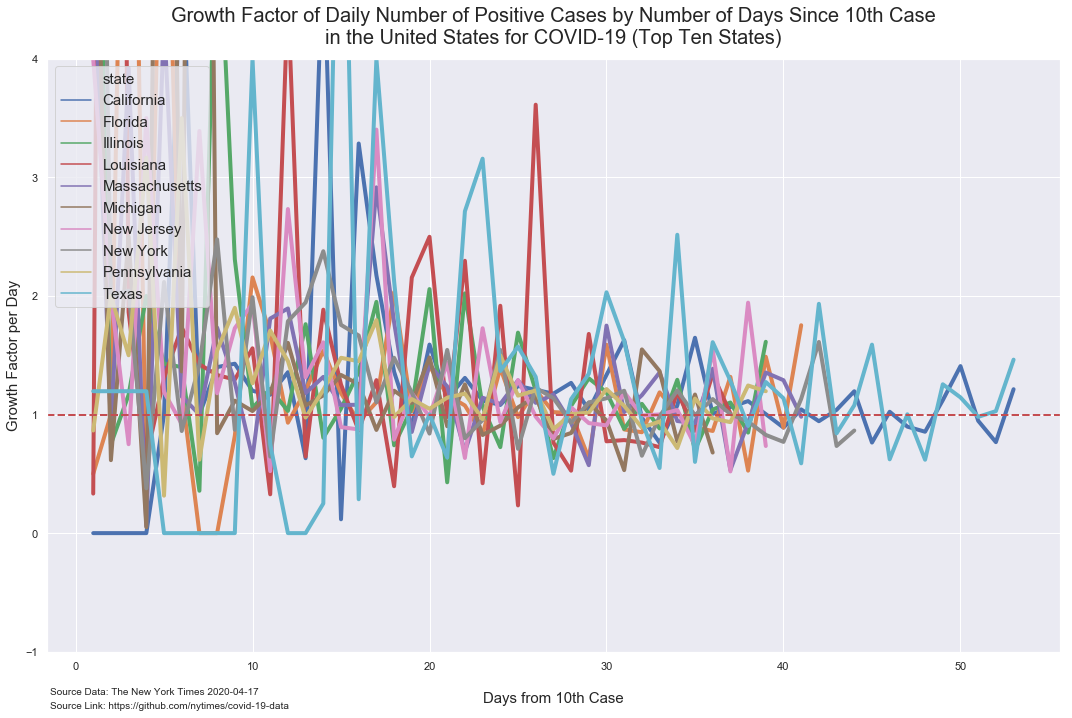

In [66]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_since_ten_case", y="growth_rate",
             hue="state", data=growth_rate , linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')

ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.ylim(-1, 4)
#plt.xlim(-1, 8)

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Growth Factor per Day', fontsize=15)
plt.title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nin the United States for COVID-19 (Top Ten States)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/growth-factor-top-10-daily')

# Weekly Growth Rate

In [67]:
growth_rate_weekly = growth_rate.set_index('date').groupby('state').resample('W').agg({'days_since_ten_case': 
                                                                    np.max, 'growth_rate': np.mean})

In [68]:
growth_rate_weekly

days_since_ten_case  growth_rate
state      date                                        
California 2020-03-01                    6     1.000000
           2020-03-08                   13     1.169137
           2020-03-15                   20     2.060502
           2020-03-22                   27     1.181124
           2020-03-29                   34     1.154254
...                                    ...          ...
Texas      2020-03-22                   27     1.609459
           2020-03-29                   34     1.446912
           2020-04-05                   41     1.057139
           2020-04-12                   48     1.097982
           2020-04-19                   53     1.174365

[67 rows x 2 columns]

In [69]:
growth_rate_weekly.reset_index(inplace=True)
growth_rate_weekly.rename(columns={'growth_rate': 'growth_rate_weekly_average'}, inplace=True)

In [70]:
growth_rate_weekly

state       date  days_since_ten_case  growth_rate_weekly_average
0   California 2020-03-01                    6                    1.000000
1   California 2020-03-08                   13                    1.169137
2   California 2020-03-15                   20                    2.060502
3   California 2020-03-22                   27                    1.181124
4   California 2020-03-29                   34                    1.154254
..         ...        ...                  ...                         ...
62       Texas 2020-03-22                   27                    1.609459
63       Texas 2020-03-29                   34                    1.446912
64       Texas 2020-04-05                   41                    1.057139
65       Texas 2020-04-12                   48                    1.097982
66       Texas 2020-04-19                   53                    1.174365

[67 rows x 4 columns]

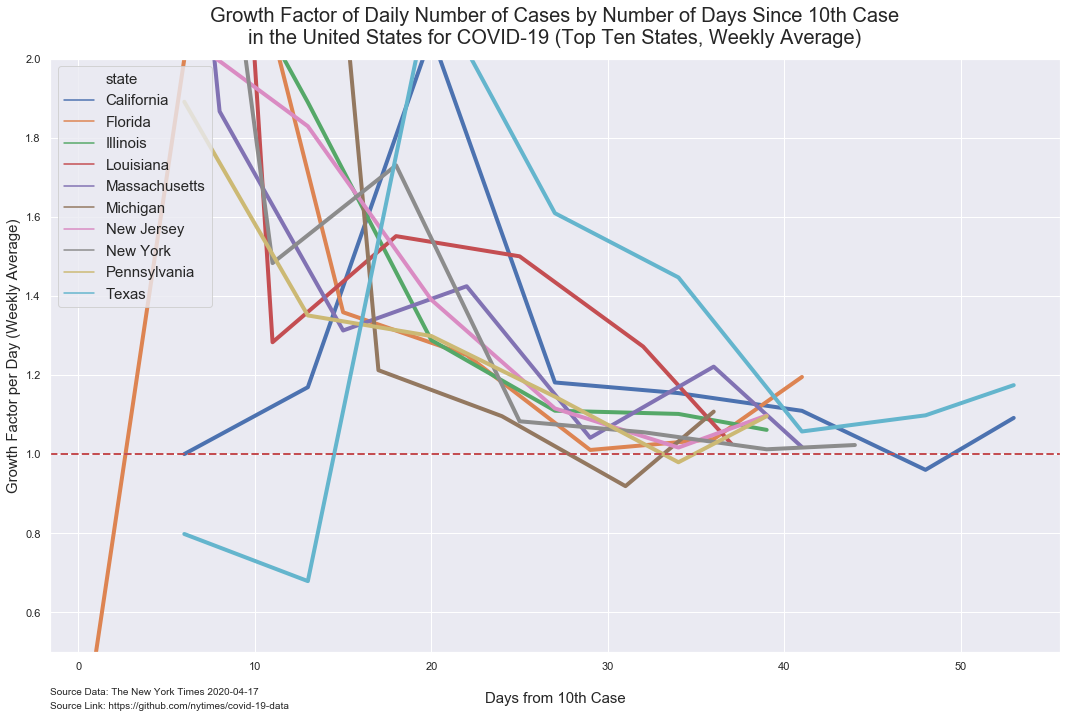

In [71]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_since_ten_case", y="growth_rate_weekly_average",
             hue="state", data=growth_rate_weekly, linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')

ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.ylim(0.5, 2)

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Growth Factor per Day (Weekly Average)', fontsize=15)
plt.title('Growth Factor of Daily Number of Cases by Number of Days Since 10th Case\nin the United States for COVID-19 (Top Ten States, Weekly Average)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/growth-factor-top-10-weekly')

# Cumulative Number of Cases

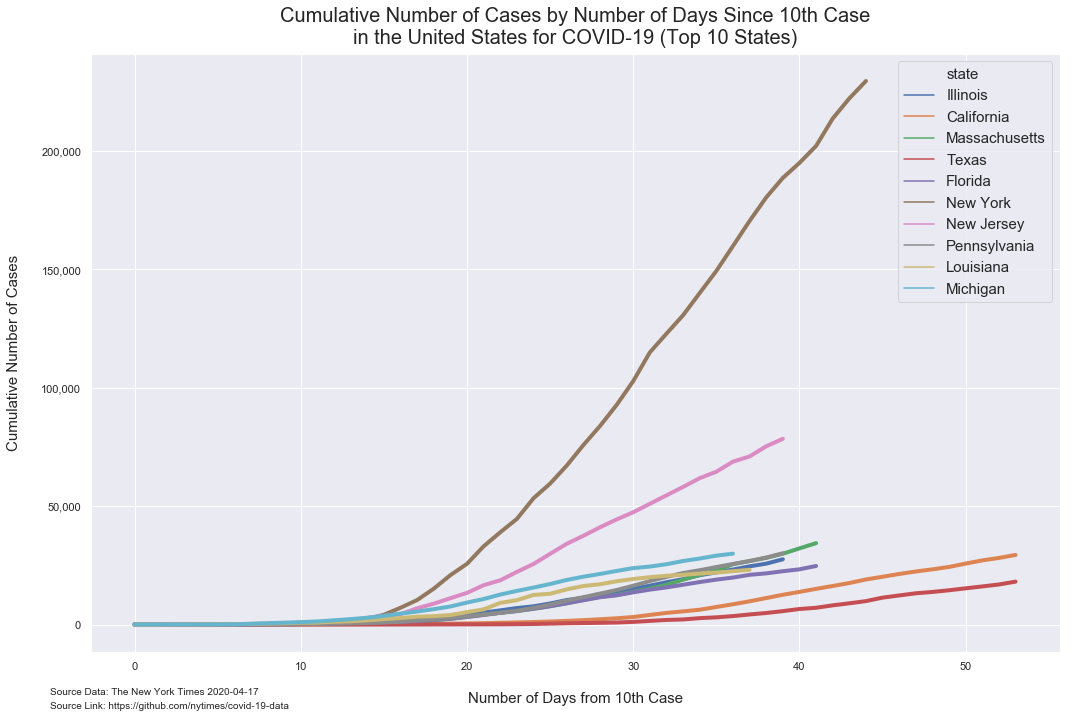

In [72]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_since_ten_case", y="cases",
             hue="state",
             data=state_ten_cases, linewidth=4)

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.grid(True)
ax1.grid(axis='x', which='minor')
ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('Number of Days from 10th Case', fontsize=15)
ax1.set_ylabel('Cumulative Number of Cases', fontsize=15)
plt.title('Cumulative Number of Cases by Number of Days Since 10th Case\nin the United States for COVID-19 (Top 10 States)', 
          pad = 10, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-tenth-case')

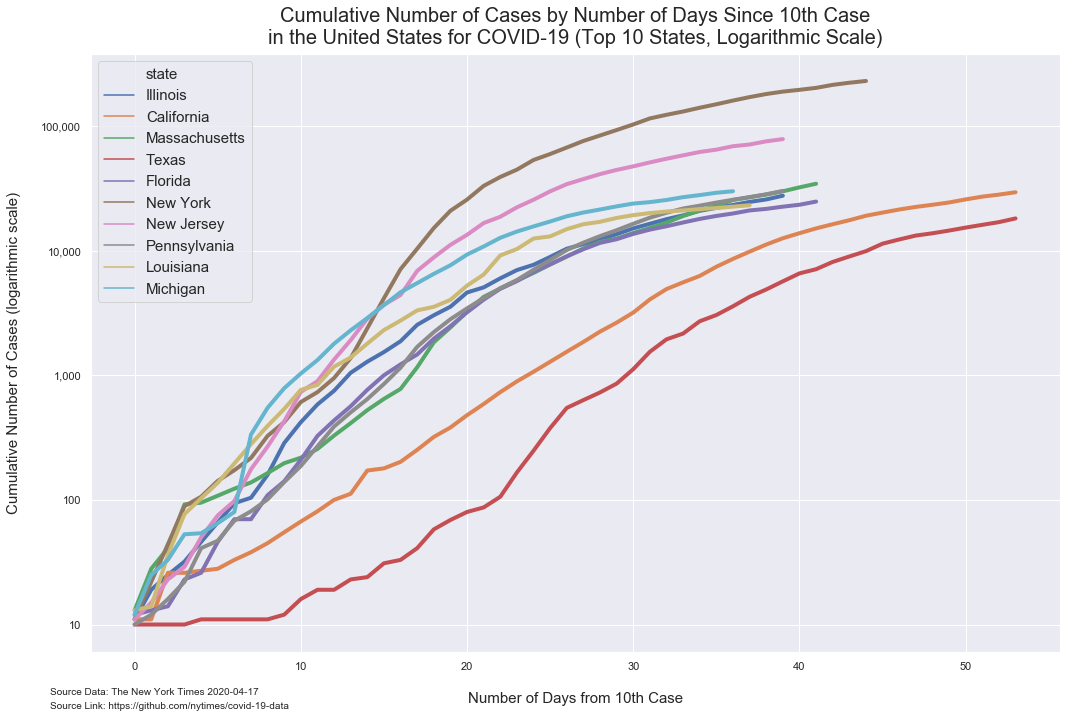

In [73]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_since_ten_case", y="cases",
             hue="state",
             data=state_ten_cases, linewidth=4)
    
ax1.set_yscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.grid(True)
ax1.grid(axis='x', which='minor')
ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('Number of Days from 10th Case', fontsize=15)
ax1.set_ylabel('Cumulative Number of Cases (logarithmic scale)', fontsize=15)
plt.title('Cumulative Number of Cases by Number of Days Since 10th Case\nin the United States for COVID-19 (Top 10 States, Logarithmic Scale)', 
          pad = 10, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-tenth-case-log')

# Cumulative Cases for All States

In [74]:
ten_cases_all_states = covid_19_state_data.loc[covid_19_state_data['cases'] >= 10]

In [75]:
ten_cases_all_states = ten_cases_all_states.sort_values(by=['date', 'cases'], 
                                ascending=[True, True], ).drop_duplicates(subset ="state", keep = 'first').reset_index(drop=True)

In [76]:
ten_cases_all_states = ten_cases_all_states[['state', 'date']]
ten_cases_all_states.rename(columns={'date': 'ten_cases_date'}, inplace=True)

In [77]:
ten_cases_all_states

state ten_cases_date
0                   Nebraska     2020-02-17
1                      Texas     2020-02-24
2                 California     2020-02-24
3                 Washington     2020-02-29
4                   New York     2020-03-04
5                    Florida     2020-03-07
6              Massachusetts     2020-03-07
7                    Georgia     2020-03-08
8                     Oregon     2020-03-08
9               Pennsylvania     2020-03-09
10                  Illinois     2020-03-09
11                New Jersey     2020-03-09
12                  Colorado     2020-03-09
13                      Iowa     2020-03-10
14      District of Columbia     2020-03-11
15            South Carolina     2020-03-11
16                  Virginia     2020-03-11
17                   Indiana     2020-03-11
18                 Louisiana     2020-03-11
19                  Maryland     2020-03-11
20                  Kentucky     2020-03-12
21                    Nevada     2020-03-12
22                  Michigan     2020-03-12
23            North Carolina     2020-03-12
24                 Tennessee     2020-03-12
25                New Mexico     2020-03-13
26               Connecticut     2020-03-13
27                      Ohio     2020-03-13
28                 Minnesota     2020-03-13
29                 Wisconsin     2020-03-13
30              Rhode Island     2020-03-13
31                   Alabama     2020-03-14
32                   Arizona     2020-03-14
33                      Utah     2020-03-14
34               Mississippi     2020-03-15
35                     Maine     2020-03-15
36             New Hampshire     2020-03-15
37                  Arkansas     2020-03-15
38                    Hawaii     2020-03-16
39                  Oklahoma     2020-03-16
40              South Dakota     2020-03-16
41                   Wyoming     2020-03-16
42                    Kansas     2020-03-16
43                   Vermont     2020-03-16
44                  Delaware     2020-03-17
45                  Missouri     2020-03-17
46                     Idaho     2020-03-18
47                   Montana     2020-03-18
48                    Alaska     2020-03-19
49                      Guam     2020-03-19
50              North Dakota     2020-03-19
51               Puerto Rico     2020-03-20
52             West Virginia     2020-03-21
53            Virgin Islands     2020-03-22
54  Northern Mariana Islands     2020-04-08

In [78]:
ten_cases_all_states = covid_19_state_data.merge(ten_cases_all_states, left_on='state', right_on='state')

In [79]:
ten_cases_all_states = ten_cases_all_states.loc[ten_cases_all_states['cases'] >= 10]

In [80]:
ten_cases_all_states

date                     state  fips  cases  deaths ten_cases_date
39   2020-02-29                Washington    53     10       1     2020-02-29
40   2020-03-01                Washington    53     17       3     2020-02-29
41   2020-03-02                Washington    53     23       6     2020-02-29
42   2020-03-03                Washington    53     32      10     2020-02-29
43   2020-03-04                Washington    53     47      11     2020-02-29
...         ...                       ...   ...    ...     ...            ...
2539 2020-04-13  Northern Mariana Islands    69     11       2     2020-04-08
2540 2020-04-14  Northern Mariana Islands    69     13       2     2020-04-08
2541 2020-04-15  Northern Mariana Islands    69     13       2     2020-04-08
2542 2020-04-16  Northern Mariana Islands    69     13       2     2020-04-08
2543 2020-04-17  Northern Mariana Islands    69     14       2     2020-04-08

[2006 rows x 6 columns]

In [81]:
ten_cases_all_states['days_from_10_cases'] = (ten_cases_all_states['date'] - 
                                              ten_cases_all_states['ten_cases_date']).dt.days

In [82]:
ten_cases_all_states

date                     state  fips  cases  deaths ten_cases_date  \
39   2020-02-29                Washington    53     10       1     2020-02-29   
40   2020-03-01                Washington    53     17       3     2020-02-29   
41   2020-03-02                Washington    53     23       6     2020-02-29   
42   2020-03-03                Washington    53     32      10     2020-02-29   
43   2020-03-04                Washington    53     47      11     2020-02-29   
...         ...                       ...   ...    ...     ...            ...   
2539 2020-04-13  Northern Mariana Islands    69     11       2     2020-04-08   
2540 2020-04-14  Northern Mariana Islands    69     13       2     2020-04-08   
2541 2020-04-15  Northern Mariana Islands    69     13       2     2020-04-08   
2542 2020-04-16  Northern Mariana Islands    69     13       2     2020-04-08   
2543 2020-04-17  Northern Mariana Islands    69     14       2     2020-04-08   

      days_from_10_cases  
39                     0  
40                     1  
41                     2  
42                     3  
43                     4  
...                  ...  
2539                   5  
2540                   6  
2541                   7  
2542                   8  
2543                   9  

[2006 rows x 7 columns]

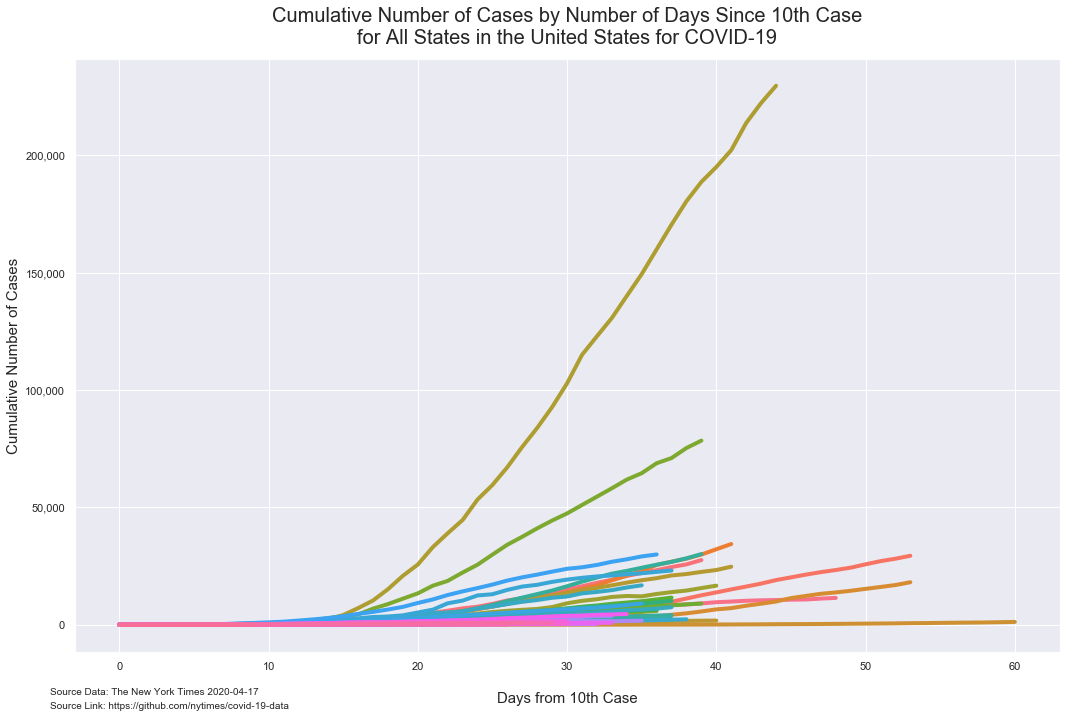

In [83]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_from_10_cases", y="cases",
             hue="state",
             data=ten_cases_all_states, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Cumulative Number of Cases', fontsize=15)
plt.title('Cumulative Number of Cases by Number of Days Since 10th Case\nfor All States in the United States for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-state')

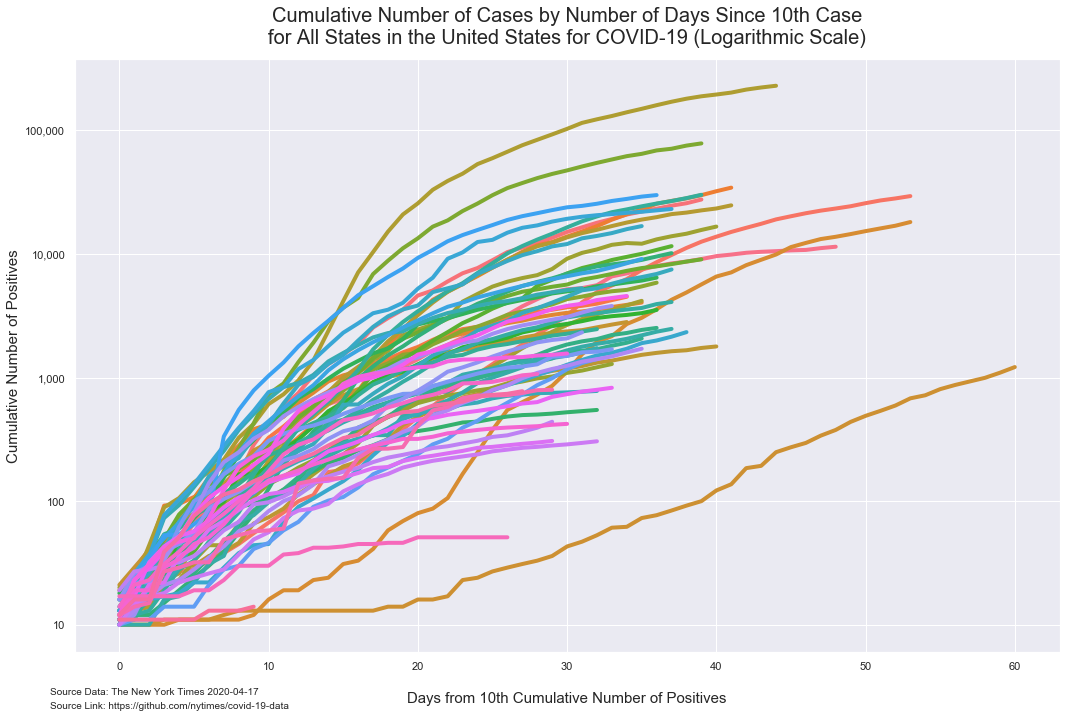

In [84]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_from_10_cases", y="cases",
             hue="state",
             data=ten_cases_all_states, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Days from 10th Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Cases by Number of Days Since 10th Case\nfor All States in the United States for COVID-19 (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-state-log')

# Trajectory Plots = daily number (log) vs. total number (log) 

## Daily

In [85]:
trajectory_plot = state_ten_cases.sort_values(by=['state', 'date','cases'], 
                                ascending=[True, True, True])

In [86]:
trajectory_plot[:50]

date       state  cases  daily_cases  deaths date_ten_case  \
115 2020-02-24  California     11          1.0       0    2020-02-24   
116 2020-02-25  California     11          0.0       0    2020-02-24   
117 2020-02-26  California     26         15.0       0    2020-02-24   
118 2020-02-27  California     26          0.0       0    2020-02-24   
119 2020-02-28  California     27          1.0       0    2020-02-24   
120 2020-02-29  California     28          1.0       0    2020-02-24   
121 2020-03-01  California     33          5.0       0    2020-02-24   
122 2020-03-02  California     38          5.0       0    2020-02-24   
123 2020-03-03  California     45          7.0       0    2020-02-24   
124 2020-03-04  California     55         10.0       1    2020-02-24   
125 2020-03-05  California     67         12.0       1    2020-02-24   
126 2020-03-06  California     81         14.0       1    2020-02-24   
127 2020-03-07  California    100         19.0       1    2020-02-24   
128 2020-03-08  California    112         12.0       1    2020-02-24   
129 2020-03-09  California    172         60.0       2    2020-02-24   
130 2020-03-10  California    179          7.0       3    2020-02-24   
131 2020-03-11  California    202         23.0       4    2020-02-24   
132 2020-03-12  California    252         50.0       4    2020-02-24   
133 2020-03-13  California    320         68.0       5    2020-02-24   
134 2020-03-14  California    381         61.0       5    2020-02-24   
135 2020-03-15  California    478         97.0       6    2020-02-24   
136 2020-03-16  California    588        110.0      11    2020-02-24   
137 2020-03-17  California    732        144.0      14    2020-02-24   
138 2020-03-18  California    893        161.0      17    2020-02-24   
139 2020-03-19  California   1067        174.0      19    2020-02-24   
140 2020-03-20  California   1283        216.0      24    2020-02-24   
141 2020-03-21  California   1544        261.0      28    2020-02-24   
142 2020-03-22  California   1851        307.0      35    2020-02-24   
143 2020-03-23  California   2240        389.0      39    2020-02-24   
144 2020-03-24  California   2644        404.0      52    2020-02-24   
145 2020-03-25  California   3183        539.0      67    2020-02-24   
146 2020-03-26  California   4060        877.0      82    2020-02-24   
147 2020-03-27  California   4914        854.0     102    2020-02-24   
148 2020-03-28  California   5565        651.0     121    2020-02-24   
149 2020-03-29  California   6266        701.0     130    2020-02-24   
150 2020-03-30  California   7421       1155.0     146    2020-02-24   
151 2020-03-31  California   8582       1161.0     183    2020-02-24   
152 2020-04-01  California   9816       1234.0     212    2020-02-24   
153 2020-04-02  California  11190       1374.0     247    2020-02-24   
154 2020-04-03  California  12569       1379.0     282    2020-02-24   
155 2020-04-04  California  13796       1227.0     323    2020-02-24   
156 2020-04-05  California  15076       1280.0     349    2020-02-24   
157 2020-04-06  California  16284       1208.0     386    2020-02-24   
158 2020-04-07  California  17540       1256.0     447    2020-02-24   
159 2020-04-08  California  19043       1503.0     506    2020-02-24   
160 2020-04-09  California  20191       1148.0     548    2020-02-24   
161 2020-04-10  California  21366       1175.0     594    2020-02-24   
162 2020-04-11  California  22421       1055.0     632    2020-02-24   
163 2020-04-12  California  23323        902.0     676    2020-02-24   
164 2020-04-13  California  24334       1011.0     725    2020-02-24   

     days_since_ten_case  
115                    0  
116                    1  
117                    2  
118                    3  
119                    4  
120                    5  
121                    6  
122                    7  
123                    8  
124                    9  
125                   10  
126          

/Users/geribauer/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


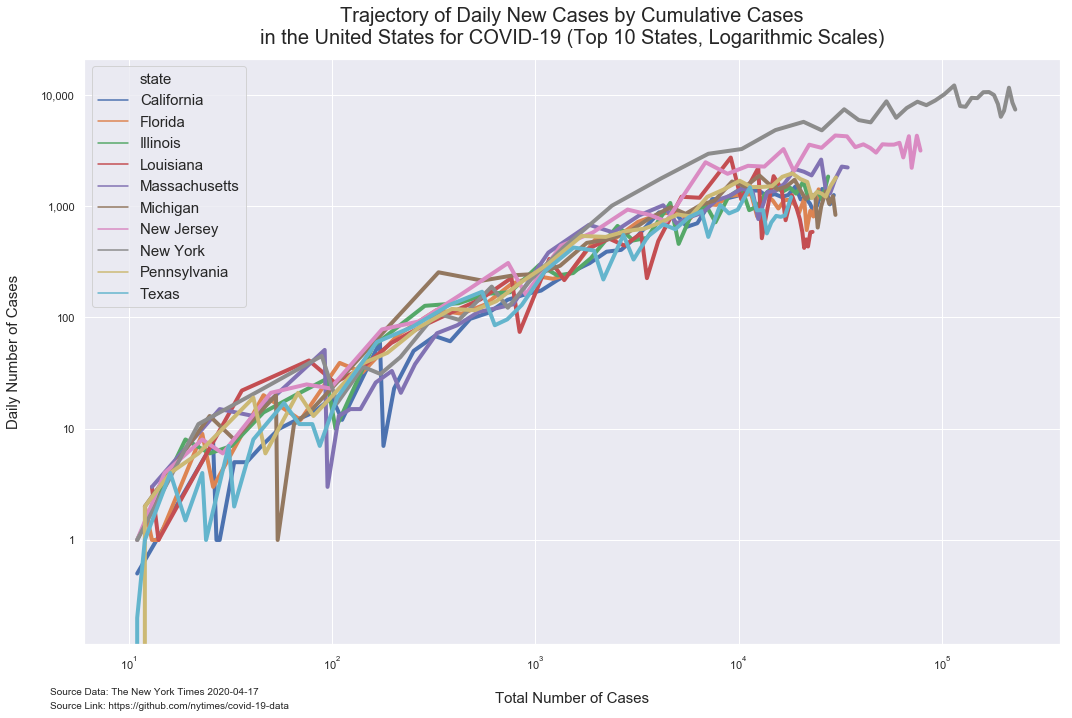

In [87]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="daily_cases",
             hue="state",
             data=trajectory_plot, linewidth=4, ci=False)
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('Total Number of Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Cases', fontsize=15)
plt.title('Trajectory of Daily New Cases by Cumulative Cases\nin the United States for COVID-19 (Top 10 States, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-trajectory-daily-plot')

## Weekly

In [88]:
trajectory_plot_weekly = trajectory_plot[['state', 'date', 'cases', 'daily_cases']]

In [89]:
trajectory_plot_weekly.head()

state       date  cases  daily_cases
115  California 2020-02-24     11          1.0
116  California 2020-02-25     11          0.0
117  California 2020-02-26     26         15.0
118  California 2020-02-27     26          0.0
119  California 2020-02-28     27          1.0

In [90]:
trajectory_plot_weekly = trajectory_plot.set_index('date').groupby('state').resample('W').agg({'cases': np.max, 
                                                                                               'daily_cases': np.mean})

In [91]:
trajectory_plot_weekly

cases  daily_cases
state      date                          
California 2020-03-01     33     3.285714
           2020-03-08    112    11.285714
           2020-03-15    478    52.285714
           2020-03-22   1851   196.142857
           2020-03-29   6266   630.714286
...                      ...          ...
Texas      2020-03-22    632    78.857143
           2020-03-29   2712   297.142857
           2020-04-05   7094   626.000000
           2020-04-12  13774   954.285714
           2020-04-19  18130   871.200000

[67 rows x 2 columns]

In [92]:
trajectory_plot_weekly.reset_index(inplace=True)

In [93]:
trajectory_plot_weekly.rename(columns={'daily_cases': 'daily_cases_weekly_average'}, inplace=True)

In [94]:
trajectory_plot_weekly

state       date  cases  daily_cases_weekly_average
0   California 2020-03-01     33                    3.285714
1   California 2020-03-08    112                   11.285714
2   California 2020-03-15    478                   52.285714
3   California 2020-03-22   1851                  196.142857
4   California 2020-03-29   6266                  630.714286
..         ...        ...    ...                         ...
62       Texas 2020-03-22    632                   78.857143
63       Texas 2020-03-29   2712                  297.142857
64       Texas 2020-04-05   7094                  626.000000
65       Texas 2020-04-12  13774                  954.285714
66       Texas 2020-04-19  18130                  871.200000

[67 rows x 4 columns]

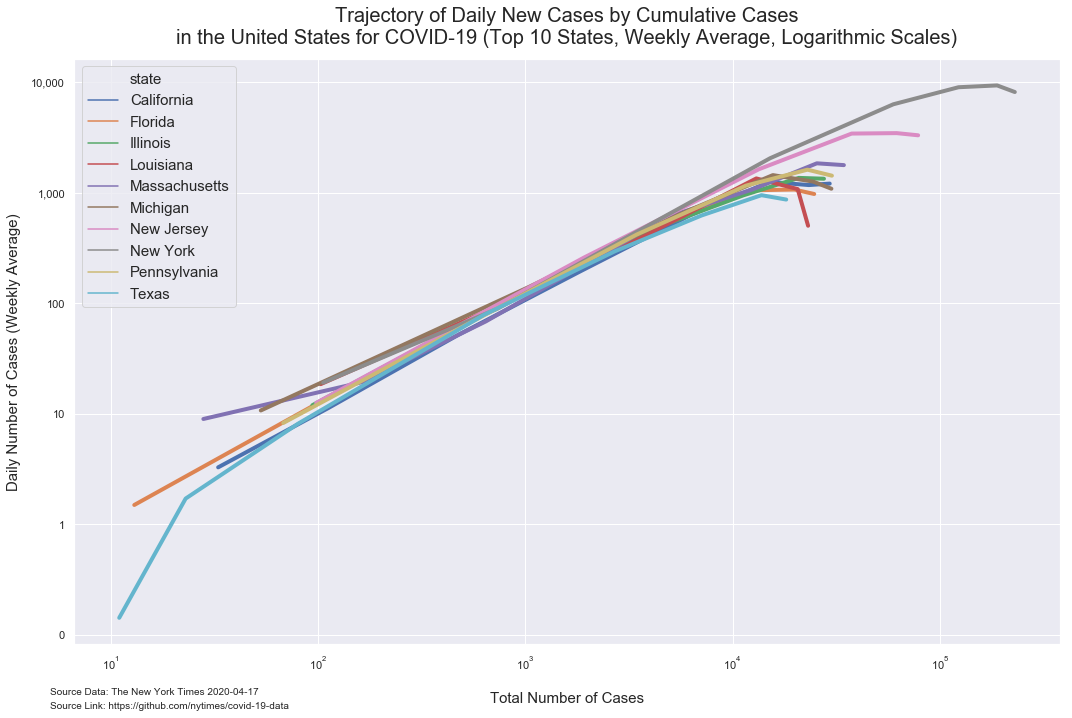

In [95]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="daily_cases_weekly_average",
             hue="state",
             data=trajectory_plot_weekly, linewidth=4)

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 10

ax1.legend(fontsize=15)
ax1.set_xlabel('Total Number of Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Trajectory of Daily New Cases by Cumulative Cases\nin the United States for COVID-19 (Top 10 States, Weekly Average, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-trajectory-weekly-plot')

# Trajectory for All States

In [96]:
trajectory_all_states = covid_19_state_data.sort_values(by=['state', 'date','cases'], 
                                ascending=[True, True, True])

In [97]:
trajectory_all_states

date    state  fips  cases  deaths
586  2020-03-13  Alabama     1      6       0
637  2020-03-14  Alabama     1     12       0
689  2020-03-15  Alabama     1     23       0
742  2020-03-16  Alabama     1     29       0
795  2020-03-17  Alabama     1     39       0
...         ...      ...   ...    ...     ...
2328 2020-04-13  Wyoming    56    275       1
2384 2020-04-14  Wyoming    56    282       1
2440 2020-04-15  Wyoming    56    288       2
2496 2020-04-16  Wyoming    56    296       2
2552 2020-04-17  Wyoming    56    305       2

[2553 rows x 5 columns]

In [98]:
trajectory_all_states['daily_cases'] = trajectory_all_states['cases'].diff()

In [99]:
trajectory_all_states[:50]

date    state  fips  cases  deaths  daily_cases
586  2020-03-13  Alabama     1      6       0          NaN
637  2020-03-14  Alabama     1     12       0          6.0
689  2020-03-15  Alabama     1     23       0         11.0
742  2020-03-16  Alabama     1     29       0          6.0
795  2020-03-17  Alabama     1     39       0         10.0
849  2020-03-18  Alabama     1     51       0         12.0
903  2020-03-19  Alabama     1     78       0         27.0
957  2020-03-20  Alabama     1    106       0         28.0
1011 2020-03-21  Alabama     1    131       0         25.0
1065 2020-03-22  Alabama     1    157       0         26.0
1119 2020-03-23  Alabama     1    196       0         39.0
1173 2020-03-24  Alabama     1    242       0         46.0
1227 2020-03-25  Alabama     1    386       1        144.0
1281 2020-03-26  Alabama     1    538       3        152.0
1335 2020-03-27  Alabama     1    639       4        101.0
1389 2020-03-28  Alabama     1    720       4         81.0
1444 2020-03-29  Alabama     1    830       5        110.0
1499 2020-03-30  Alabama     1    947      11        117.0
1554 2020-03-31  Alabama     1    999      13         52.0
1609 2020-04-01  Alabama     1   1106      28        107.0
1664 2020-04-02  Alabama     1   1270      32        164.0
1719 2020-04-03  Alabama     1   1535      38        265.0
1774 2020-04-04  Alabama     1   1633      44         98.0
1829 2020-04-05  Alabama     1   1841      45        208.0
1884 2020-04-06  Alabama     1   2006      53        165.0
1939 2020-04-07  Alabama     1   2197      64        191.0
1994 2020-04-08  Alabama     1   2499      67        302.0
2049 2020-04-09  Alabama     1   2838      78        339.0
2105 2020-04-10  Alabama     1   3008      80        170.0
2161 2020-04-11  Alabama     1   3262      93        254.0
2217 2020-04-12  Alabama     1   3583      93        321.0
2273 2020-04-13  Alabama     1   3805     104        222.0
2329 2020-04-14  Alabama     1   3953     114        148.0
2385 2020-04-15  Alabama     1   4241     123        288.0
2441 2020-04-16  Alabama     1   4404     137        163.0
2497 2020-04-17  Alabama     1   4572     151        168.0
539  2020-03-12   Alaska     2      1       0      -4571.0
587  2020-03-13   Alaska     2      1       0          0.0
638  2020-03-14   Alaska     2      1       0          0.0
690  2020-03-15   Alaska     2      1       0          0.0
743  2020-03-16   Alaska     2      3       0          2.0
796  2020-03-17   Alaska     2      6       0          3.0
850  2020-03-18   Alaska     2      9       0          3.0
904  2020-03-19   Alaska     2     12       0          3.0
958  2020-03-20   Alaska     2     14       0          2.0
1012 2020-03-21   Alaska     2     21       0          7.0
1066 2020-03-22   Alaska     2     22       0          1.0
1120 2020-03-23   Alaska     2     36       0         14.0
1174 2020-03-24   Alaska     2     42       0          6.0
1228 2020-03-25   Alaska     2     59       0         17.0

In [100]:
trajectory_all_states['daily_cases'].loc[trajectory_all_states.daily_cases < 0] = trajectory_all_states.cases
trajectory_all_states['daily_cases'].loc[trajectory_all_states.daily_cases.isnull()] = trajectory_all_states.cases

In [101]:
trajectory_all_states[:50]

date    state  fips  cases  deaths  daily_cases
586  2020-03-13  Alabama     1      6       0          6.0
637  2020-03-14  Alabama     1     12       0          6.0
689  2020-03-15  Alabama     1     23       0         11.0
742  2020-03-16  Alabama     1     29       0          6.0
795  2020-03-17  Alabama     1     39       0         10.0
849  2020-03-18  Alabama     1     51       0         12.0
903  2020-03-19  Alabama     1     78       0         27.0
957  2020-03-20  Alabama     1    106       0         28.0
1011 2020-03-21  Alabama     1    131       0         25.0
1065 2020-03-22  Alabama     1    157       0         26.0
1119 2020-03-23  Alabama     1    196       0         39.0
1173 2020-03-24  Alabama     1    242       0         46.0
1227 2020-03-25  Alabama     1    386       1        144.0
1281 2020-03-26  Alabama     1    538       3        152.0
1335 2020-03-27  Alabama     1    639       4        101.0
1389 2020-03-28  Alabama     1    720       4         81.0
1444 2020-03-29  Alabama     1    830       5        110.0
1499 2020-03-30  Alabama     1    947      11        117.0
1554 2020-03-31  Alabama     1    999      13         52.0
1609 2020-04-01  Alabama     1   1106      28        107.0
1664 2020-04-02  Alabama     1   1270      32        164.0
1719 2020-04-03  Alabama     1   1535      38        265.0
1774 2020-04-04  Alabama     1   1633      44         98.0
1829 2020-04-05  Alabama     1   1841      45        208.0
1884 2020-04-06  Alabama     1   2006      53        165.0
1939 2020-04-07  Alabama     1   2197      64        191.0
1994 2020-04-08  Alabama     1   2499      67        302.0
2049 2020-04-09  Alabama     1   2838      78        339.0
2105 2020-04-10  Alabama     1   3008      80        170.0
2161 2020-04-11  Alabama     1   3262      93        254.0
2217 2020-04-12  Alabama     1   3583      93        321.0
2273 2020-04-13  Alabama     1   3805     104        222.0
2329 2020-04-14  Alabama     1   3953     114        148.0
2385 2020-04-15  Alabama     1   4241     123        288.0
2441 2020-04-16  Alabama     1   4404     137        163.0
2497 2020-04-17  Alabama     1   4572     151        168.0
539  2020-03-12   Alaska     2      1       0          1.0
587  2020-03-13   Alaska     2      1       0          0.0
638  2020-03-14   Alaska     2      1       0          0.0
690  2020-03-15   Alaska     2      1       0          0.0
743  2020-03-16   Alaska     2      3       0          2.0
796  2020-03-17   Alaska     2      6       0          3.0
850  2020-03-18   Alaska     2      9       0          3.0
904  2020-03-19   Alaska     2     12       0          3.0
958  2020-03-20   Alaska     2     14       0          2.0
1012 2020-03-21   Alaska     2     21       0          7.0
1066 2020-03-22   Alaska     2     22       0          1.0
1120 2020-03-23   Alaska     2     36       0         14.0
1174 2020-03-24   Alaska     2     42       0          6.0
1228 2020-03-25   Alaska     2     59       0         17.0

In [102]:
trajectory_all_states = trajectory_all_states.set_index('date').groupby('state').resample('W').agg({'cases': np.max, 
                                                                                                    'daily_cases': np.mean})
trajectory_all_states.reset_index(inplace=True)
trajectory_all_states.rename(columns={'daily_cases': 'daily_cases_week_avg'}, inplace=True)

In [103]:
trajectory_all_states.head()

state       date  cases  daily_cases_week_avg
0  Alabama 2020-03-15     23              7.666667
1  Alabama 2020-03-22    157             19.142857
2  Alabama 2020-03-29    830             96.142857
3  Alabama 2020-04-05   1841            144.428571
4  Alabama 2020-04-12   3583            248.857143

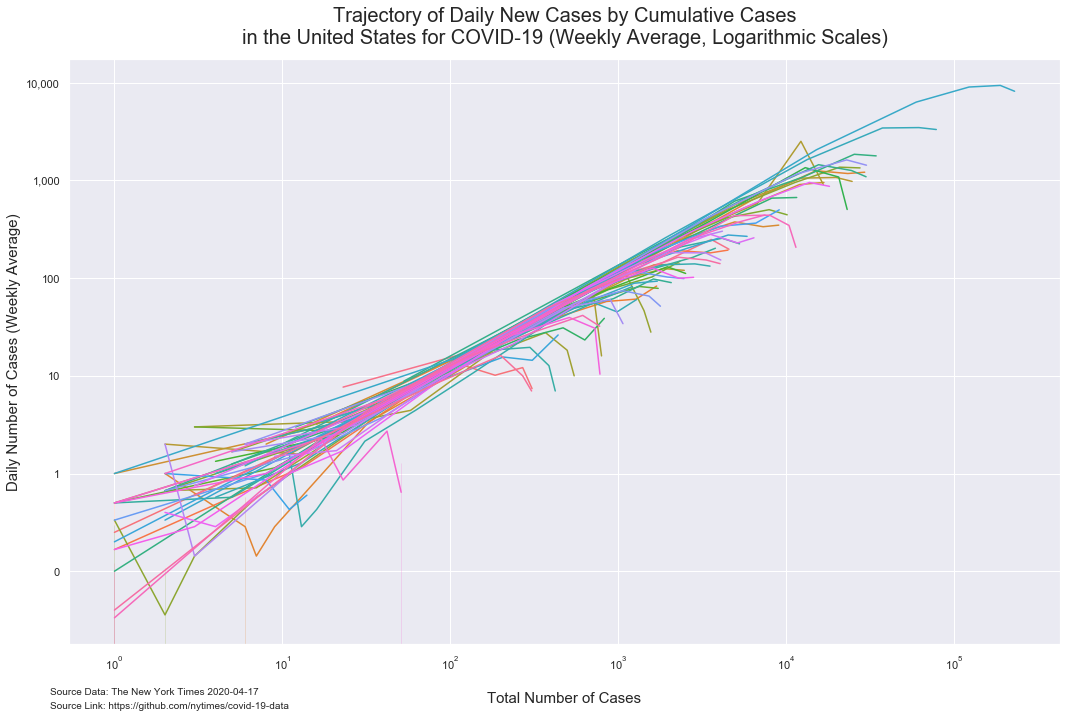

In [104]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="daily_cases_week_avg",
             hue="state",
             data=trajectory_all_states)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

ax1.legend_.remove()
ax1.set_xlabel('Total Number of Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Trajectory of Daily New Cases by Cumulative Cases\nin the United States for COVID-19 (Weekly Average, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-all-states-trajectory-weekly-plot')

In [105]:
trajectory_all_states_scatter = trajectory_all_states.sort_values(by=['date', 'cases'], 
                                              ascending=[False, False]).drop_duplicates(subset ="state", 
                                                                                        keep = 'first').reset_index(drop=True)

In [106]:
trajectory_all_states_scatter

state       date   cases  daily_cases_week_avg
0                   New York 2020-04-19  229642                8189.6
1                 New Jersey 2020-04-19   78467                3323.4
2              Massachusetts 2020-04-19   34402                1785.4
3               Pennsylvania 2020-04-19   30121                1433.2
4                   Michigan 2020-04-19   29952                1091.6
5                 California 2020-04-19   29398                1215.0
6                   Illinois 2020-04-19   27575                1344.6
7                    Florida 2020-04-19   24745                 978.0
8                  Louisiana 2020-04-19   23118                 504.6
9                      Texas 2020-04-19   18130                 871.2
10               Connecticut 2020-04-19   16809                 954.8
11                   Georgia 2020-04-19   16658                 911.0
12                  Maryland 2020-04-19   11572                 669.4
13                Washington 2020-04-19   11445                 206.8
14                   Indiana 2020-04-19   10154                 445.2
15                      Ohio 2020-04-19    9107                 500.6
16                  Colorado 2020-04-19    9047                 348.8
17                  Virginia 2020-04-19    7491                 443.4
18                 Tennessee 2020-04-19    6438                 258.8
19            North Carolina 2020-04-19    5859                 267.8
20                  Missouri 2020-04-19    5283                 224.6
21                   Alabama 2020-04-19    4572                 197.8
22                   Arizona 2020-04-19    4507                 193.6
23              Rhode Island 2020-04-19    4177                 302.4
24            South Carolina 2020-04-19    4086                 153.4
25                 Wisconsin 2020-04-19    4045                 140.8
26               Mississippi 2020-04-19    3793                 202.4
27                    Nevada 2020-04-19    3524                 132.8
28                      Utah 2020-04-19    2813                 102.0
29                  Kentucky 2020-04-19    2522                 111.8
30      District of Columbia 2020-04-19    2476                 120.2
31                  Oklahoma 2020-04-19    2465                  99.0
32                      Iowa 2020-04-19    2332                 149.0
33                  Delaware 2020-04-19    2323                 139.6
34                 Minnesota 2020-04-19    2071                  90.0
35                    Oregon 2020-04-19    1785                  51.6
36                    Kansas 2020-04-19    1731                  78.6
37                New Mexico 2020-04-19    1711                  93.2
38                  Arkansas 2020-04-19    1695                  83.0
39                     Idaho 2020-04-19    1566                  28.0
40              South Dakota 2020-04-19    1411                 136.2
41             New Hampshire 2020-04-19    1287                  60.4
42                  Nebraska 2020-04-19    1216                  82.0
43               Puerto Rico 2020-04-19    1068                  34.2
44                     Maine 2020-04-19     827                  38.8
45                      Guam 2020-04-19     796                  16.0
46                   Vermont 2020-04-19     779                  10.4
47             West Virginia 2020-04-19     776                  32.2
48                    Hawaii 2020-04-19     547                  10.0
49              North Dakota 2020-04-19     439                  26.2
50                   Montana 2020-04-19     422                   7.0
51                    Alaska 2020-04-19     307                   7.4
52                   Wyoming 2020-04-19     305                   7.0
53            Virgin Islands 2020-04-19      51                   0.0
54  Northern Mariana Islands 2020-04-19      14                   0.6
55            American Samoa 2020-04-19       0                   0.0

In [107]:
len(trajectory_all_states_scatter)

56

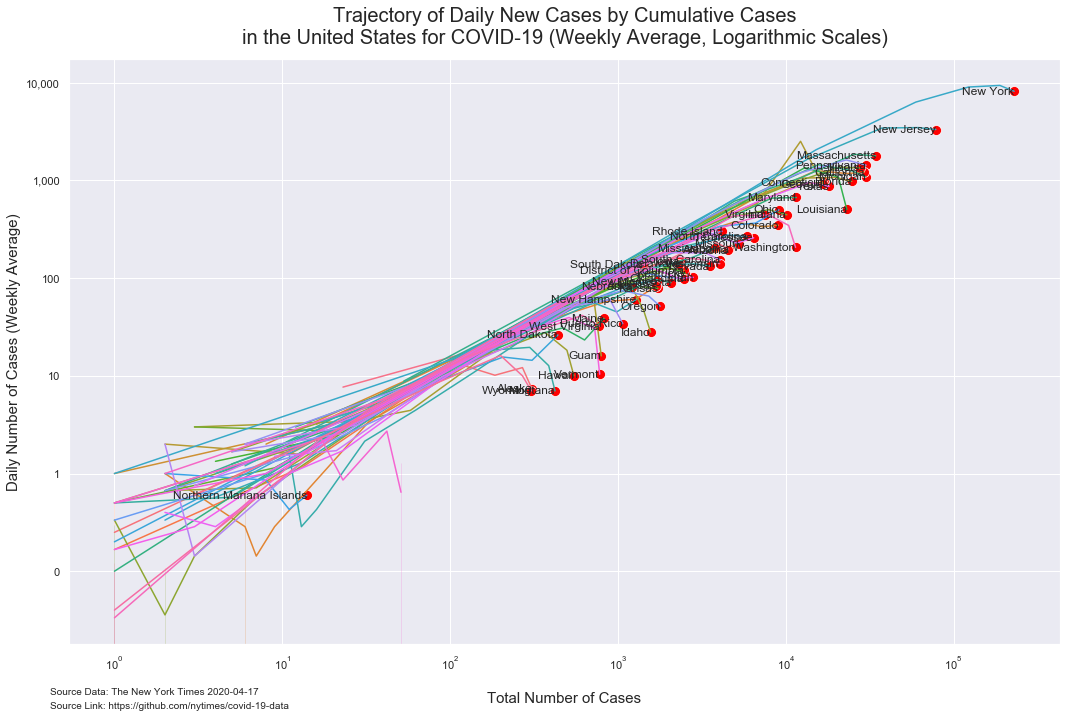

In [108]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="daily_cases_week_avg",
             hue="state",
             data=trajectory_all_states)

sns.scatterplot(x="cases", y="daily_cases_week_avg", 
             data=trajectory_all_states_scatter, s=100, ax=ax1, color='red')


x = trajectory_all_states_scatter.daily_cases_week_avg
z = trajectory_all_states_scatter.cases
n = trajectory_all_states_scatter.state
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), fontsize=12,
                 horizontalalignment='right', va='center', clip_on=True)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5
#ax1.set_xbound(lower=100)

ax1.legend_.remove()
ax1.set_xlabel('Total Number of Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Trajectory of Daily New Cases by Cumulative Cases\nin the United States for COVID-19 (Weekly Average, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-all-states-trajectory-weekly-plot-labels')

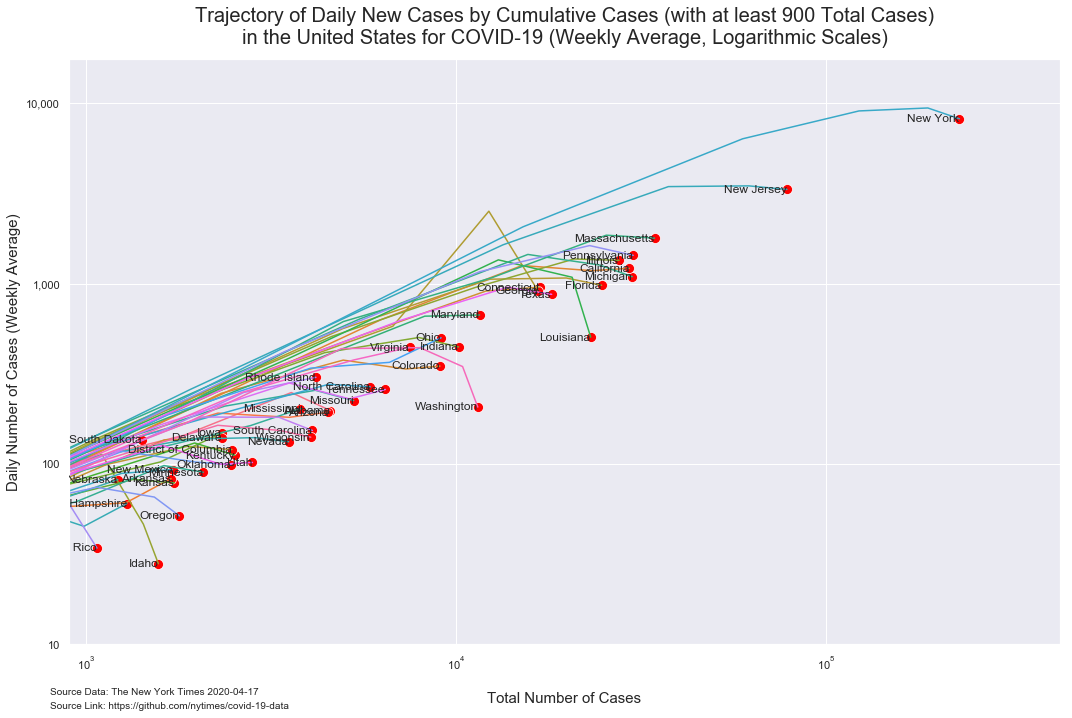

In [109]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="daily_cases_week_avg",
             hue="state",
             data=trajectory_all_states)

sns.scatterplot(x="cases", y="daily_cases_week_avg", 
             data=trajectory_all_states_scatter, s=100, ax=ax1, color='red')


x = trajectory_all_states_scatter.daily_cases_week_avg
z = trajectory_all_states_scatter.cases
n = trajectory_all_states_scatter.state
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), fontsize=12,
                 horizontalalignment='right', va='center', clip_on=True)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

plt.xlim(900)
plt.ylim(10)


ax1.legend_.remove()
ax1.set_xlabel('Total Number of Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Trajectory of Daily New Cases by Cumulative Cases (with at least 900 Total Cases)\nin the United States for COVID-19 (Weekly Average, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-all-states-trajectory-weekly-plot-labels-xlimit')

# Timeseries for USA

In [110]:
g = covid_19_state_data.groupby('date')['cases'].sum().reset_index()

g.set_index('date', drop=False, inplace=True)

g.index = pd.to_datetime(g.index, infer_datetime_format=True)

In [111]:
g.index.dtype

dtype('<M8[ns]')

In [112]:
g.head()

date  cases
date                        
2020-01-21 2020-01-21      1
2020-01-22 2020-01-22      1
2020-01-23 2020-01-23      1
2020-01-24 2020-01-24      2
2020-01-25 2020-01-25      3

In [113]:
g.tail()

date   cases
date                         
2020-04-13 2020-04-13  580850
2020-04-14 2020-04-14  607285
2020-04-15 2020-04-15  637053
2020-04-16 2020-04-16  668531
2020-04-17 2020-04-17  699852

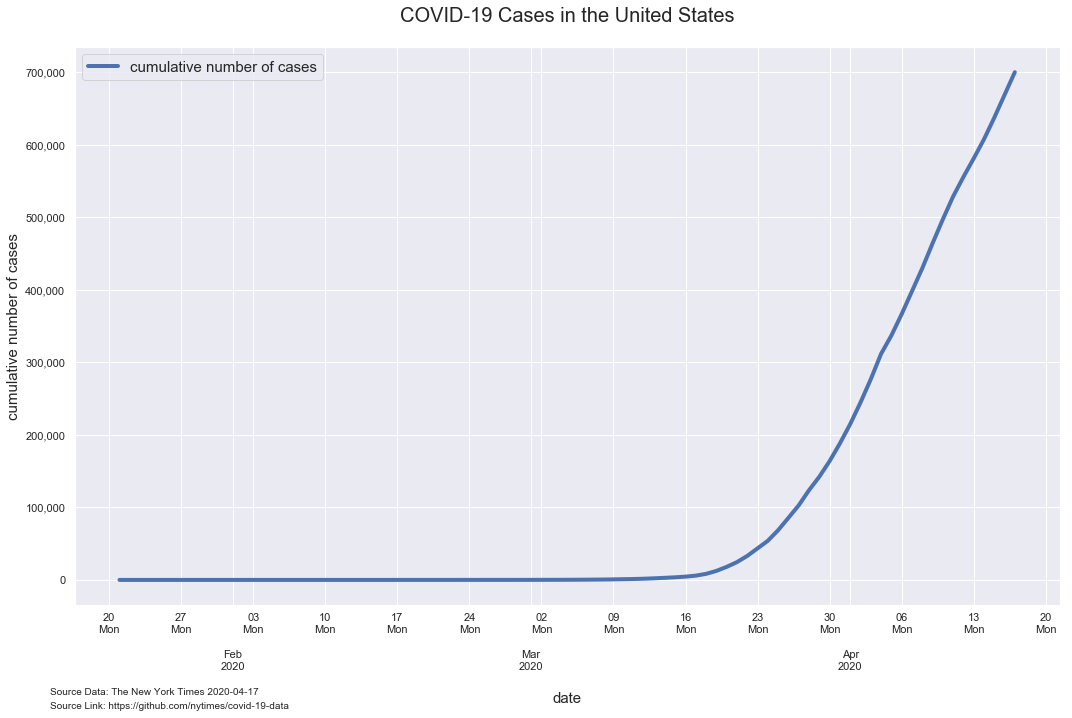

In [114]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

ax1.plot(g['cases'], linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.set_xlabel('date', fontsize=15, labelpad = 20)
ax1.set_ylabel('cumulative number of cases', fontsize=15)

ax1.grid(True)
ax1.grid(which='minor')

ax1.legend(['cumulative number of cases'], loc=2, fontsize=15)
plt.title('COVID-19 Cases in the United States', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-linear')

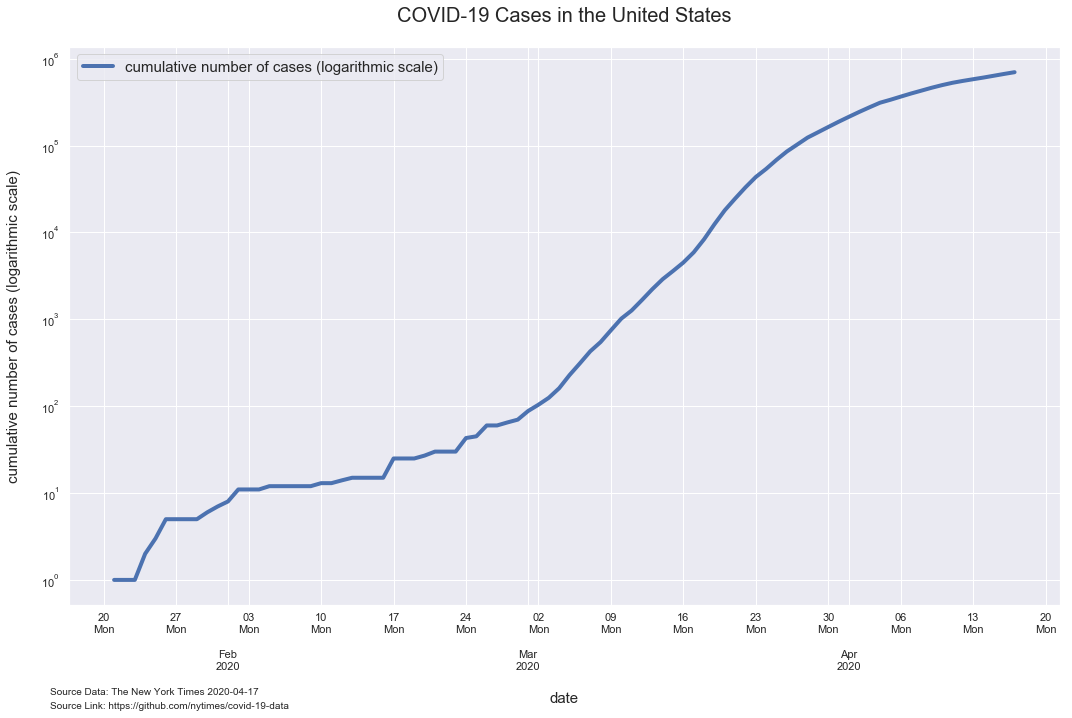

In [115]:
fig, ax2 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

ax2.plot(g['cases'], linewidth=4)

ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax2.xaxis.grid(True, which="major")
ax2.xaxis.set_major_locator(dates.MonthLocator())
ax2.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax2.set_xlabel('date', fontsize=15, labelpad = 20)
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15, labelpad = 20)

ax2.grid(True)
ax2.grid(which='minor', axis='x')

ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=0, fontsize=15)
plt.title('COVID-19 Cases in the United States', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

ax2.set_yscale('log')
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-log')

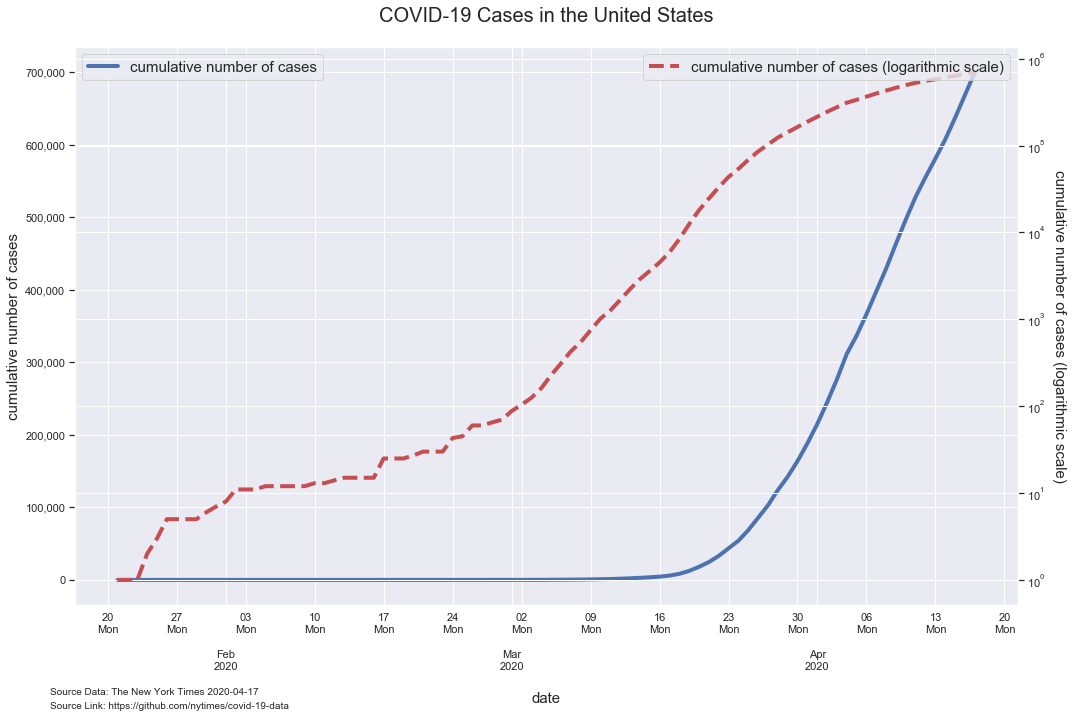

In [116]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

# Plot 1
ax1.plot(g['cases'], linewidth=4)

# Plot 2
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(g['cases'], linewidth=4, color='r', linestyle='dashed')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0),interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))

ax1.set_ylabel('cumulative number of cases', fontsize=15)
ax1.set_xlabel('date', fontsize=15, labelpad = 20)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15, rotation = 270, labelpad = 20)
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.get_yaxis().set_visible(True)
ax2.set_yscale('log')

ax1.grid(True)
ax1.grid(which='minor')
ax2.tick_params(axis='both', which='minor', length=0)
plt.setp(ax2.get_yticklabels(), visible=True)

ax1.legend(['cumulative number of cases'], loc=2, fontsize=15)
ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=1, fontsize=15)
plt.title('COVID-19 Cases in the United States', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-overlay')

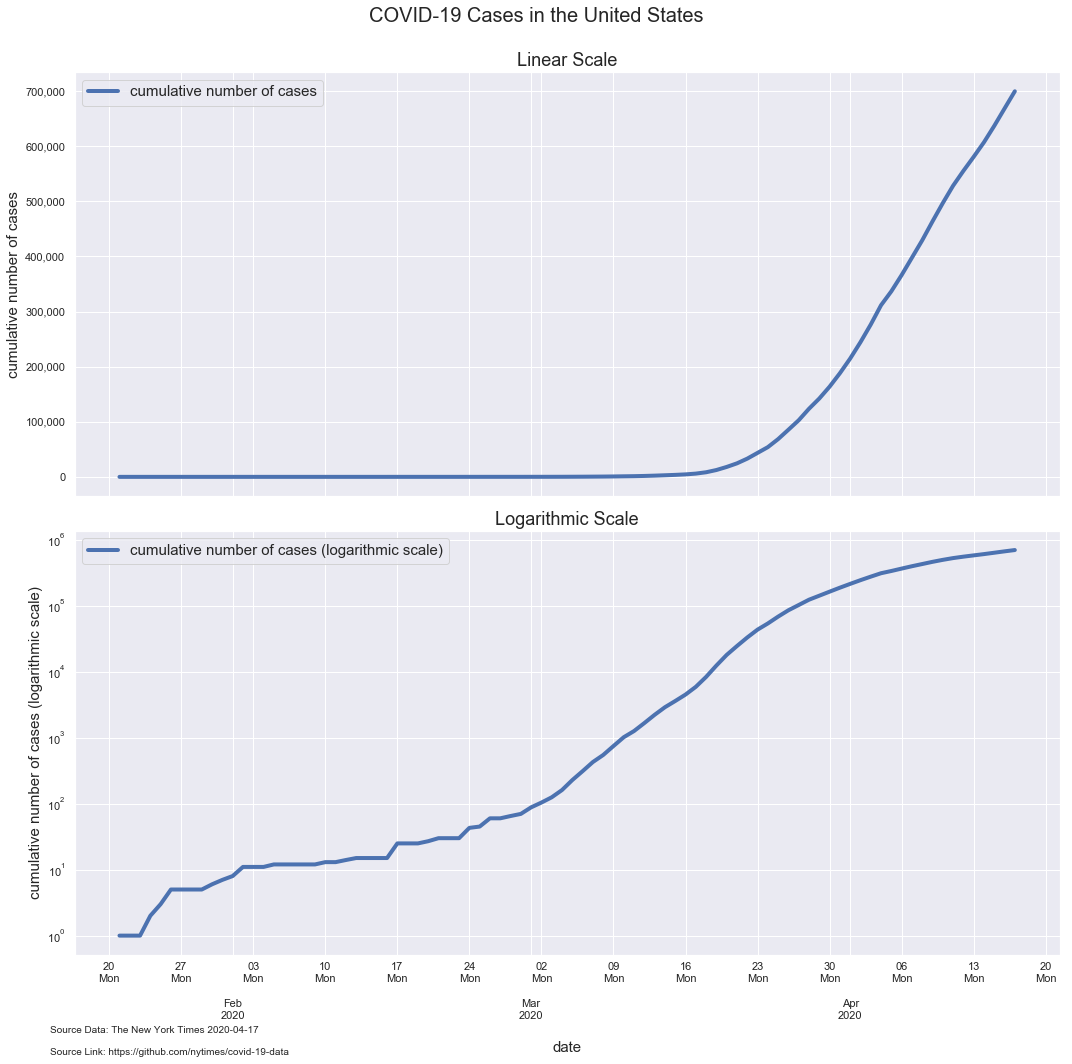

In [117]:
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True, figsize=(15,15))
fig.suptitle('COVID-19 Cases in the United States', fontsize=20)
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

# Plot 1
ax1.plot(g['cases'], linewidth=4)
ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.set_ylabel('cumulative number of cases', fontsize=15)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Formatting Grid
ax1.grid(True)
ax1.grid(which='minor')

# Plot 2
ax2.plot(g['cases'], linewidth=4)
ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15)
ax2.set_xlabel('date', fontsize=15, labelpad = 20)
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax2.xaxis.grid(True, which="major")
ax2.xaxis.set_major_locator(dates.MonthLocator())
ax2.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Formatting Grid
ax2.grid(True)
ax2.grid(which='minor', axis='x')

# Formatting Figure
ax1.legend(['cumulative number of cases'], loc=2, fontsize=15)
ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=2, fontsize=15)
ax1.set_title('Linear Scale', fontsize=18)
ax2.set_title('Logarithmic Scale', fontsize=18)
ax2.set_yscale('log')

plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.savefig('figures/nyt-covid-19-data-2-subplots')

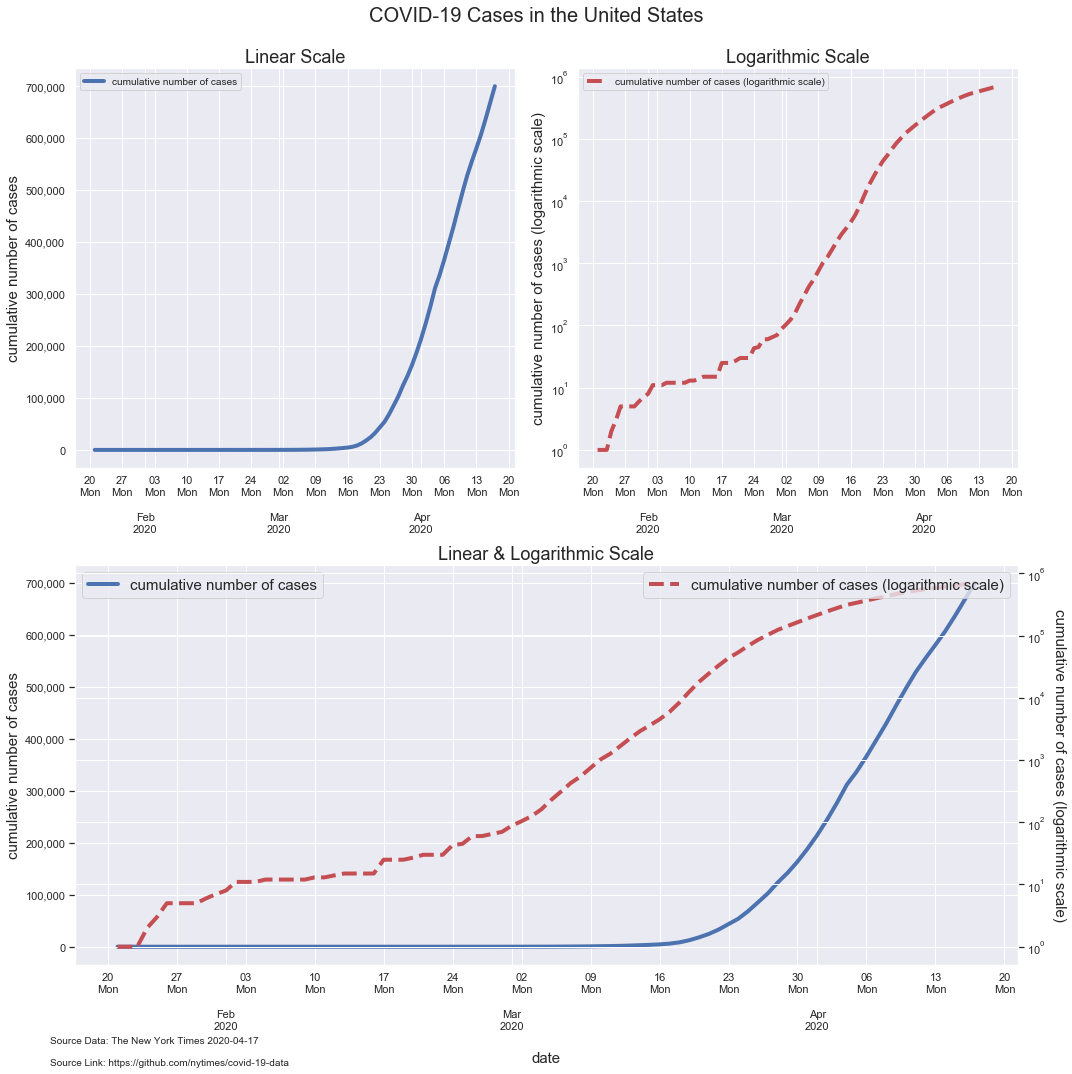

In [118]:
fig, [ax1, ax2, ax3, ax3_1] = plt.subplots(4, 1, sharex=True, figsize=(15,15))
fig.suptitle('COVID-19 Cases in the United States', y = .99, fontsize=20)
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

# Plot 1
ax3 = plt.subplot(212)
ax3.plot(g['cases'], linewidth=4)
ax3.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax3.set_xlabel('Date', fontsize=15, labelpad = 20)
ax3.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax3_1 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
ax3_1.plot(g['cases'], linewidth=4, color='r', linestyle='dashed')
ax3_1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax3_1.xaxis.grid(True, which="major")
ax3_1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3_1.set_yscale('log')

ax3.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax3.xaxis.grid(True, which="major")
ax3.xaxis.set_major_locator(dates.MonthLocator())
ax3.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Plot 2
ax1 = plt.subplot(221)
ax1.plot(g['cases'], linewidth=4)
ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))


# Plot 3
ax2 = plt.subplot(222)
ax2.plot(g['cases'], linewidth=4, color='r', linestyle='dashed')
ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))

ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax2.xaxis.grid(True, which="major")
ax2.xaxis.set_major_locator(dates.MonthLocator())
ax2.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Formatting Grid
ax1.grid(True)
ax1.grid(which='minor')
ax2.grid(True)
ax2.grid(which='minor', axis='x')
ax3.grid(True)
ax3.grid(which='minor')
ax3_1.grid(True)
ax3_1.grid(which='minor', axis='x')
ax3_1.tick_params(axis='both', which='minor', length=0)

# Setting Labels
ax1.set_ylabel('cumulative number of cases', fontsize=15)
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15)
ax3.set_ylabel('cumulative number of cases', fontsize=15)
ax3.set_xlabel('date', fontsize=15, labelpad = 20)
ax3_1.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15, rotation = 270, labelpad = 20)
ax2.get_yaxis().set_visible(True)
ax2.set_yscale('log')
ax2.get_yaxis().set_visible(True)
ax3_1.get_yaxis().set_visible(True)
ax3_1.set_yscale('log')
ax3_1.get_yaxis().set_visible(True)

# Setting Titles
ax1.set_title('\n\nLinear Scale', fontsize=18)
ax2.set_title('Logarithmic Scale', fontsize=18)
ax3.set_title('Linear & Logarithmic Scale', fontsize=18)

# Setting Legends
ax1.legend(['cumulative number of cases'], loc=2, fontsize=10)
ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=2, fontsize=10)
ax3.legend(['cumulative number of cases'], loc=2, fontsize=15)
ax3_1.legend(['cumulative number of cases (logarithmic scale)'], loc=1, fontsize=15)

plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-3-subplots')

# Country Trajectory Plot

In [119]:
g['daily_cases'] = g['cases'].diff()

In [120]:
g.head(20)

date  cases  daily_cases
date                                     
2020-01-21 2020-01-21      1          NaN
2020-01-22 2020-01-22      1          0.0
2020-01-23 2020-01-23      1          0.0
2020-01-24 2020-01-24      2          1.0
2020-01-25 2020-01-25      3          1.0
2020-01-26 2020-01-26      5          2.0
2020-01-27 2020-01-27      5          0.0
2020-01-28 2020-01-28      5          0.0
2020-01-29 2020-01-29      5          0.0
2020-01-30 2020-01-30      6          1.0
2020-01-31 2020-01-31      7          1.0
2020-02-01 2020-02-01      8          1.0
2020-02-02 2020-02-02     11          3.0
2020-02-03 2020-02-03     11          0.0
2020-02-04 2020-02-04     11          0.0
2020-02-05 2020-02-05     12          1.0
2020-02-06 2020-02-06     12          0.0
2020-02-07 2020-02-07     12          0.0
2020-02-08 2020-02-08     12          0.0
2020-02-09 2020-02-09     12          0.0

In [121]:
g['daily_cases'].loc[g.daily_cases < 0] = g.cases
g['daily_cases'].loc[g.daily_cases.isnull()] = g.cases

In [122]:
g[:50]

date  cases  daily_cases
date                                     
2020-01-21 2020-01-21      1          1.0
2020-01-22 2020-01-22      1          0.0
2020-01-23 2020-01-23      1          0.0
2020-01-24 2020-01-24      2          1.0
2020-01-25 2020-01-25      3          1.0
2020-01-26 2020-01-26      5          2.0
2020-01-27 2020-01-27      5          0.0
2020-01-28 2020-01-28      5          0.0
2020-01-29 2020-01-29      5          0.0
2020-01-30 2020-01-30      6          1.0
2020-01-31 2020-01-31      7          1.0
2020-02-01 2020-02-01      8          1.0
2020-02-02 2020-02-02     11          3.0
2020-02-03 2020-02-03     11          0.0
2020-02-04 2020-02-04     11          0.0
2020-02-05 2020-02-05     12          1.0
2020-02-06 2020-02-06     12          0.0
2020-02-07 2020-02-07     12          0.0
2020-02-08 2020-02-08     12          0.0
2020-02-09 2020-02-09     12          0.0
2020-02-10 2020-02-10     13          1.0
2020-02-11 2020-02-11     13          0.0
2020-02-12 2020-02-12     14          1.0
2020-02-13 2020-02-13     15          1.0
2020-02-14 2020-02-14     15          0.0
2020-02-15 2020-02-15     15          0.0
2020-02-16 2020-02-16     15          0.0
2020-02-17 2020-02-17     25         10.0
2020-02-18 2020-02-18     25          0.0
2020-02-19 2020-02-19     25          0.0
2020-02-20 2020-02-20     27          2.0
2020-02-21 2020-02-21     30          3.0
2020-02-22 2020-02-22     30          0.0
2020-02-23 2020-02-23     30          0.0
2020-02-24 2020-02-24     43         13.0
2020-02-25 2020-02-25     45          2.0
2020-02-26 2020-02-26     60         15.0
2020-02-27 2020-02-27     60          0.0
2020-02-28 2020-02-28     65          5.0
2020-02-29 2020-02-29     70          5.0
2020-03-01 2020-03-01     88         18.0
2020-03-02 2020-03-02    104         16.0
2020-03-03 2020-03-03    125         21.0
2020-03-04 2020-03-04    161         36.0
2020-03-05 2020-03-05    228         67.0
2020-03-06 2020-03-06    311         83.0
2020-03-07 2020-03-07    428        117.0
2020-03-08 2020-03-08    547        119.0
2020-03-09 2020-03-09    748        201.0
2020-03-10 2020-03-10   1018        270.0

In [123]:
g_weekly = g.set_index('date').resample('W').agg({'cases': np.max, 'daily_cases': np.mean})

In [124]:
g_weekly

cases   daily_cases
date                            
2020-01-26       5      0.833333
2020-02-02      11      0.857143
2020-02-09      12      0.142857
2020-02-16      15      0.428571
2020-02-23      30      2.142857
2020-03-01      88      8.285714
2020-03-08     547     65.571429
2020-03-15    3600    436.142857
2020-03-22   33061   4208.714286
2020-03-29  142194  15590.428571
2020-04-05  336774  27797.142857
2020-04-12  555325  31221.571429
2020-04-19  699852  28905.400000

In [125]:
g_weekly.reset_index(inplace=True)
g_weekly.rename(columns={'cases_diff': 'cases_daily_week_avg'}, inplace=True)

In [126]:
g_weekly

date   cases   daily_cases
0  2020-01-26       5      0.833333
1  2020-02-02      11      0.857143
2  2020-02-09      12      0.142857
3  2020-02-16      15      0.428571
4  2020-02-23      30      2.142857
5  2020-03-01      88      8.285714
6  2020-03-08     547     65.571429
7  2020-03-15    3600    436.142857
8  2020-03-22   33061   4208.714286
9  2020-03-29  142194  15590.428571
10 2020-04-05  336774  27797.142857
11 2020-04-12  555325  31221.571429
12 2020-04-19  699852  28905.400000

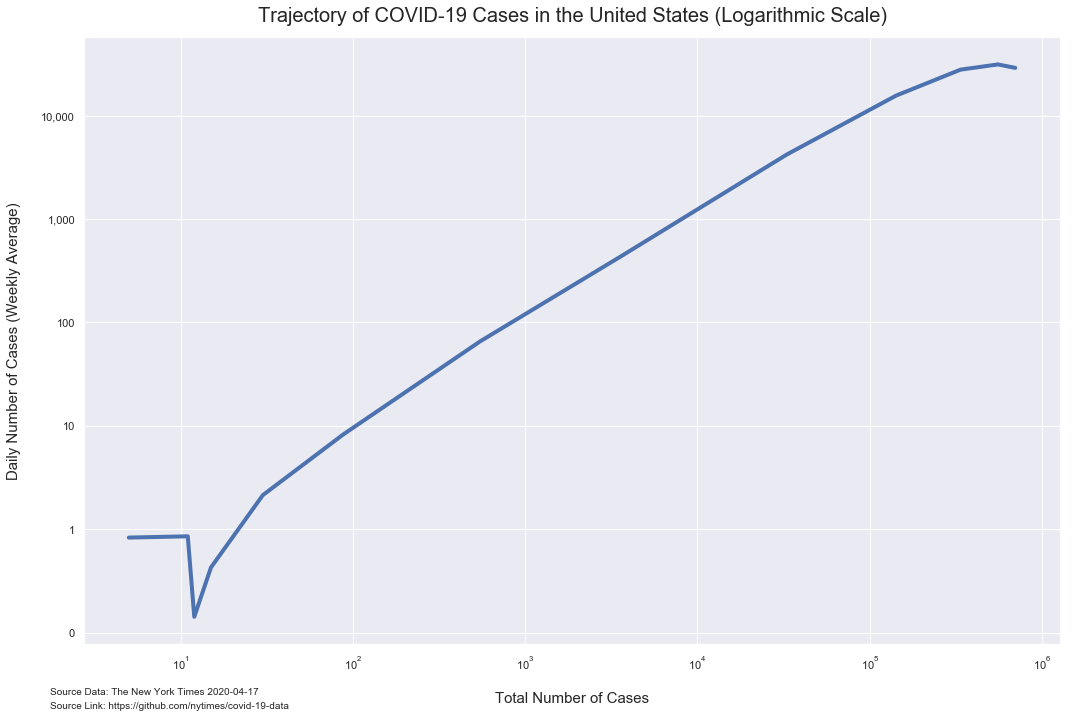

In [127]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="daily_cases", data=g_weekly, linewidth=4)
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.set_xlabel('Total Number of Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Trajectory of COVID-19 Cases in the United States (Logarithmic Scale)', 
          pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-usa-trajectory-weekly-plot')

# Bar Chart

In [128]:
covid_19_state_data

date          state  fips  cases  deaths
0    2020-01-21     Washington    53      1       0
1    2020-01-22     Washington    53      1       0
2    2020-01-23     Washington    53      1       0
3    2020-01-24       Illinois    17      1       0
4    2020-01-24     Washington    53      1       0
...         ...            ...   ...    ...     ...
2548 2020-04-17       Virginia    51   7491     238
2549 2020-04-17     Washington    53  11445     610
2550 2020-04-17  West Virginia    54    776      16
2551 2020-04-17      Wisconsin    55   4045     205
2552 2020-04-17        Wyoming    56    305       2

[2553 rows x 5 columns]

In [129]:
# dropping ALL duplicate values 
state_current_cases = covid_19_state_data.sort_values(by = 'date', 
                    ascending=False).drop_duplicates(
                    subset ="state", keep = 'first')

In [130]:
state_current_cases.head()

date          state  fips  cases  deaths
2552 2020-04-17        Wyoming    56    305       2
2524 2020-04-17       Missouri    29   5283     184
2522 2020-04-17      Minnesota    27   2071     111
2521 2020-04-17       Michigan    26  29952    2226
2520 2020-04-17  Massachusetts    25  34402    1404

In [131]:
state_current_cases.state.value_counts()

Mississippi                 1
New Mexico                  1
Massachusetts               1
New York                    1
Wyoming                     1
Hawaii                      1
Nevada                      1
Kansas                      1
Texas                       1
Vermont                     1
Guam                        1
South Dakota                1
Idaho                       1
Iowa                        1
Nebraska                    1
North Carolina              1
District of Columbia        1
Delaware                    1
Connecticut                 1
Missouri                    1
American Samoa              1
Alaska                      1
Virgin Islands              1
Virginia                    1
Arkansas                    1
Montana                     1
Rhode Island                1
Ohio                        1
Maine                       1
Washington                  1
Arizona                     1
Wisconsin                   1
Illinois                    1
Indiana   

In [132]:
state_current_cases.loc[state_current_cases.state == 'New York']

date     state  fips   cases  deaths
2531 2020-04-17  New York    36  229642   12822

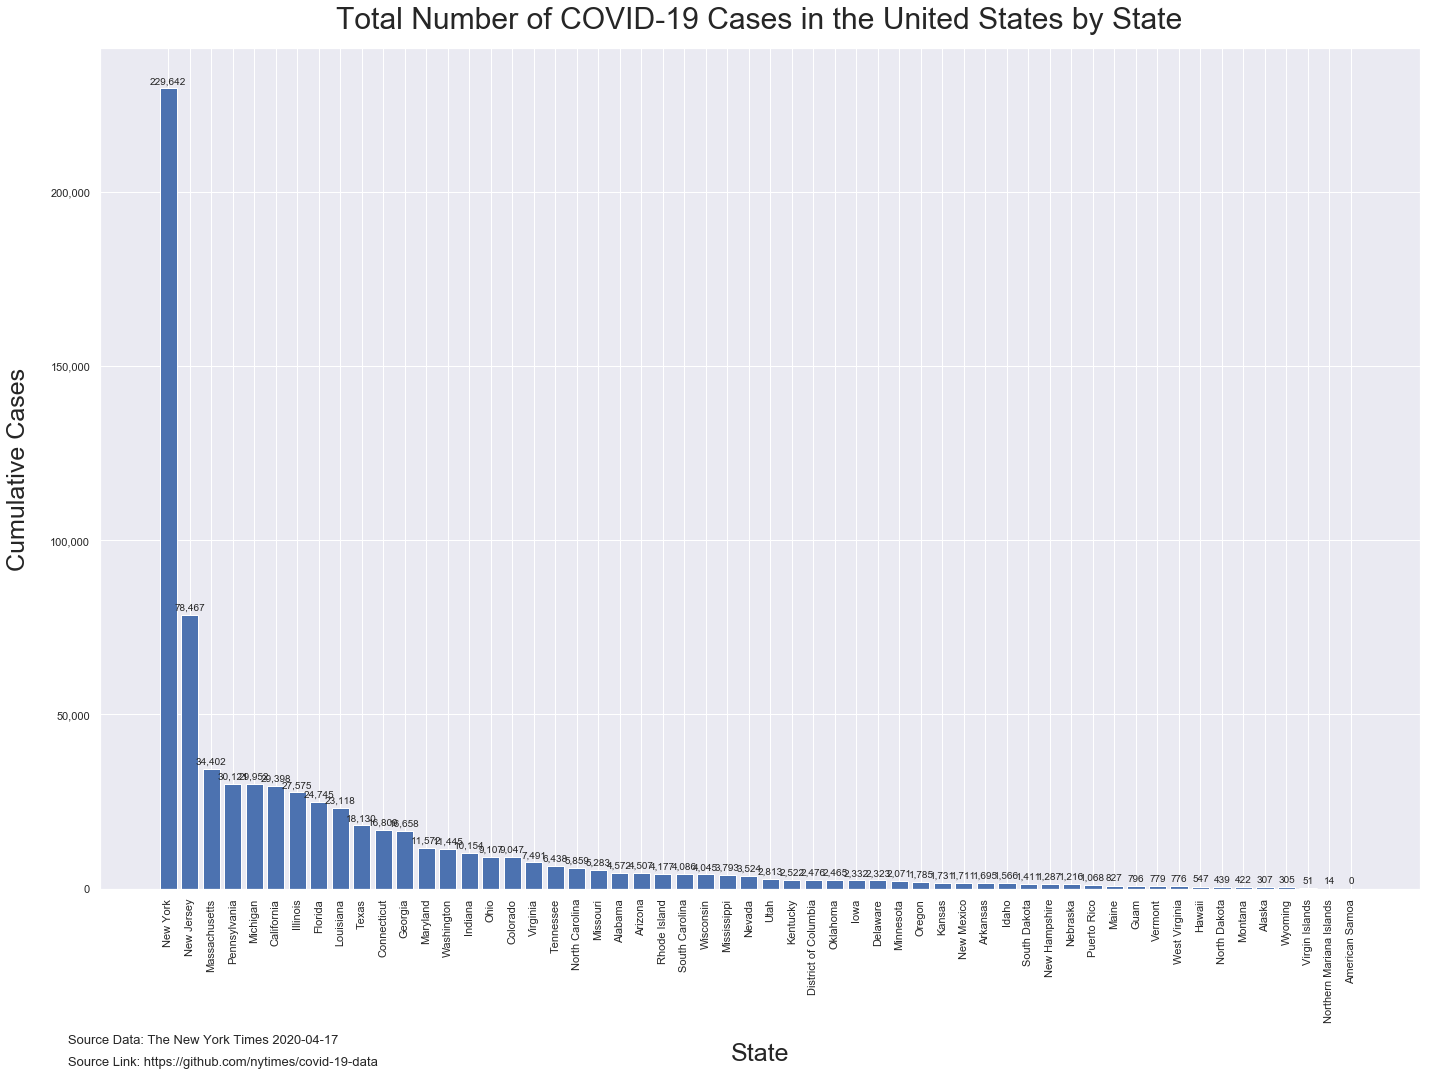

In [133]:
bar = state_current_cases.sort_values(by = 'cases', 
                    ascending=False)
bar.set_index('state', drop=False, inplace=True)

plt.subplots(figsize=(20,15))
ax = plt.subplot()

label = ax.bar(bar.index, bar.cases)
plt.xlabel("State", labelpad=14, fontsize=25)
plt.xticks(rotation=90)
plt.ylabel("Cumulative Cases", labelpad=14, fontsize=25)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:,}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(label)

txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=13)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=13)

plt.title("Total Number of COVID-19 Cases in the United States by State", pad=20, fontsize=30)
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-bar')

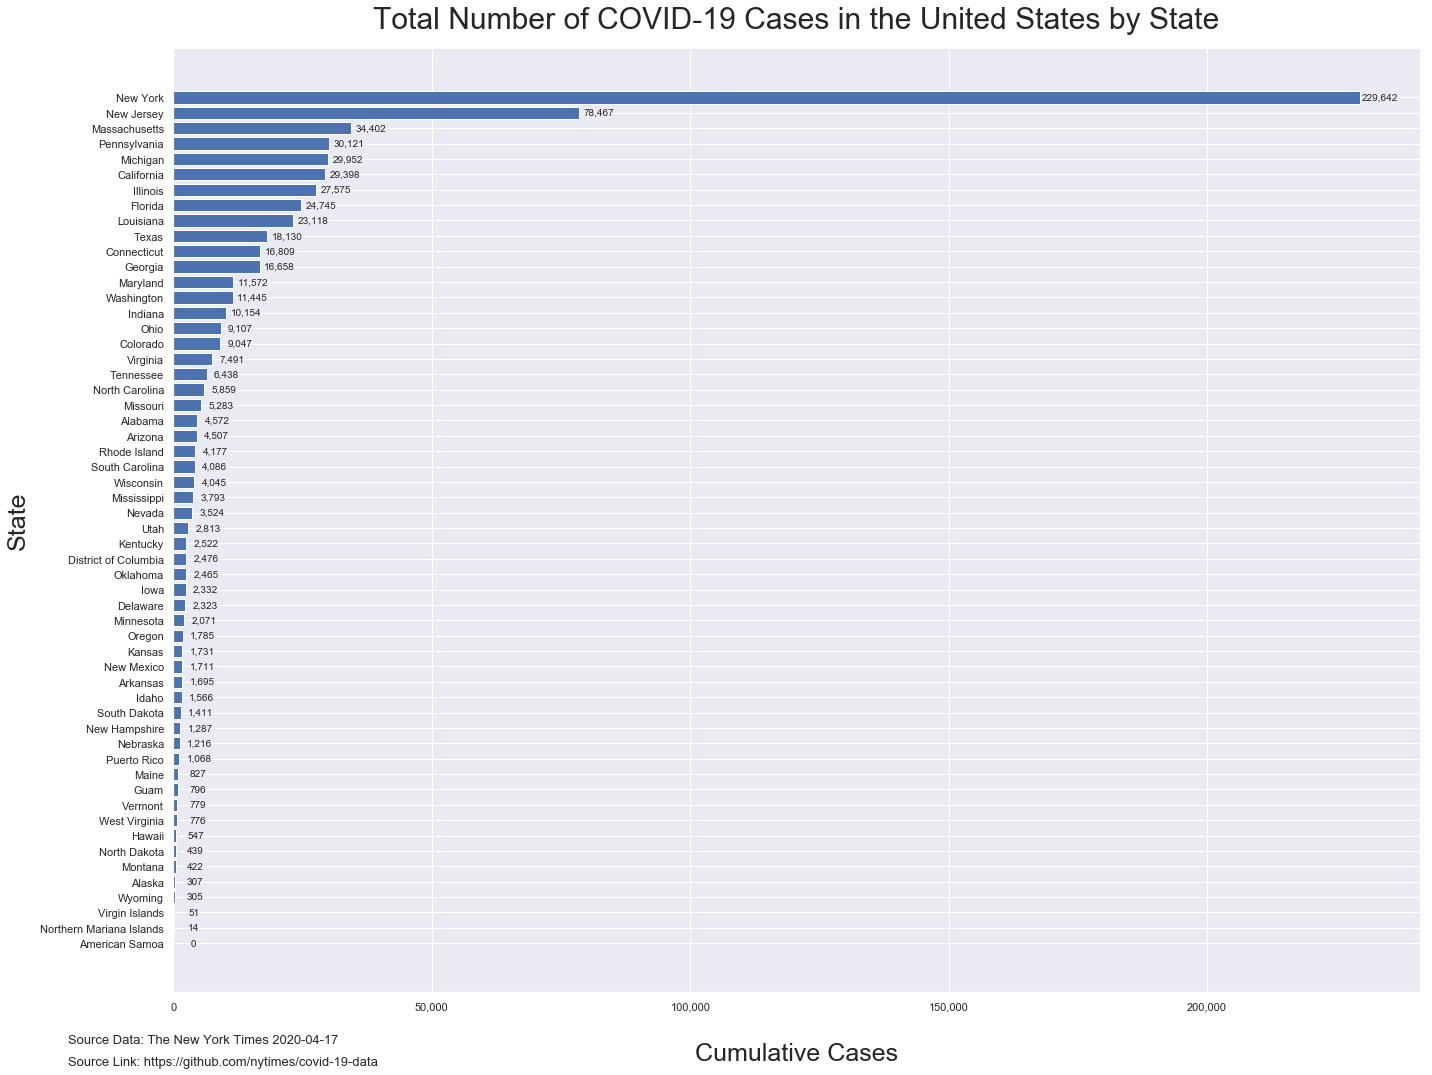

In [134]:
bar = state_current_cases.sort_values(by = 'cases', 
                    ascending=True)
bar.set_index('state', drop=False, inplace=True)

plt.subplots(figsize=(20,15))
ax = plt.subplot()

label_1 = ax.barh(bar.index, bar.cases)
plt.xlabel("Cumulative Cases", labelpad=14, fontsize=25)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("State", labelpad=14, fontsize=25)
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 10

def autolabel_1(rects):
    for rect in rects:
        width = rect.get_width()
        yloc = rect.get_y() + rect.get_height() / 2
        ax.annotate('{:,}'.format(width), 
                    xy=(width, yloc), 
                    xytext=(20, 0),
                    textcoords="offset points",
                    ha='center', va='center')
                
autolabel_1(label_1)

txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=13)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=13)

plt.title("Total Number of COVID-19 Cases in the United States by State", pad=20, fontsize=30)
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-barh')

# I have downloaded the shapefile already

In [135]:
#url = 'https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip'

# data_path = 'data'
# fullfilename = os.path.join(data_path, 'state_shape.gz')
# urllib.request.urlretrieve(url, fullfilename)

In [136]:
#file_path = 'data/state_shape.gz'

# items = zipfile.ZipFile(file_path)

# available files in the container
# print(items.namelist())

In [137]:
# opening Zip using 'with' keyword in read mode
# with zipfile.ZipFile(file_path, 'r') as file:
#     file.extractall(data_path)

In [138]:
states_shape = gpd.GeoDataFrame.from_file('data/cb_2018_us_state_500k.shp')

In [139]:
states_shape.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      28  01779790  0400000US28    28     MS     Mississippi   00   
1      37  01027616  0400000US37    37     NC  North Carolina   00   
2      40  01102857  0400000US40    40     OK        Oklahoma   00   
3      51  01779803  0400000US51    51     VA        Virginia   00   
4      54  01779805  0400000US54    54     WV   West Virginia   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry  
0  (POLYGON ((-88.502966 30.215235, -88.491759 30...  
1  (POLYGON ((-75.72680699999999 35.935844, -75.7...  
2  POLYGON ((-103.002565 36.526588, -103.002188 3...  
3  (POLYGON ((-75.742406 37.80835, -75.741512 37....  
4  POLYGON ((-82.6431981036679 38.1690897960737, ...

In [140]:
states_shape.sort_values(by='NAME')

STATEFP   STATENS     AFFGEOID GEOID STUSPS  \
17      01  01779775  0400000US01    01     AL   
27      02  01785533  0400000US02    02     AK   
37      60  01802701  0400000US60    60     AS   
35      04  01779777  0400000US04    04     AZ   
52      05  00068085  0400000US05    05     AR   
16      06  01779778  0400000US06    06     CA   
21      08  01779779  0400000US08    08     CO   
45      69  01779809  0400000US69    69     MP   
55      09  01779780  0400000US09    09     CT   
43      10  01779781  0400000US10    10     DE   
36      11  01702382  0400000US11    11     DC   
9       12  00294478  0400000US12    12     FL   
18      13  01705317  0400000US13    13     GA   
44      66  01802705  0400000US66    66     GU   
42      15  01779782  0400000US15    15     HI   
8       16  01779783  0400000US16    16     ID   
29      17  01779784  0400000US17    17     IL   
53      18  00448508  0400000US18    18     IN   
32      19  01779785  0400000US19    19     IA   
26      20  00481813  0400000US20    20     KS   
47      21  01779786  0400000US21    21     KY   
5       22  01629543  0400000US22    22     LA   
41      23  01779787  0400000US23    23     ME   
40      24  01714934  0400000US24    24     MD   
7       25  00606926  0400000US25    25     MA   
6       26  01779789  0400000US26    26     MI   
54      27  00662849  0400000US27    27     MN   
0       28  01779790  0400000US28    28     MS   
20      29  01779791  0400000US29    29     MO   
31      30  00767982  0400000US30    30     MT   
10      31  01779792  0400000US31    31     NE   
28      32  01779793  0400000US32    32     NV   
34      33  01779794  0400000US33    33     NH   
39      34  01779795  0400000US34    34     NJ   
12      35  00897535  0400000US35    35     NM   
25      36  01779796  0400000US36    36     NY   
1       37  01027616  0400000US37    37     NC   
51      38  01779797  0400000US38    38     ND   
48      39  01085497  0400000US39    39     OH   
2       40  01102857  0400000US40    40     OK   
50      41  01155107  0400000US41    41     OR   
19      42  01779798  0400000US42    42     PA   
13      72  01779808  0400000US72    72     PR   
46      44  01219835  0400000US44    44     RI   
33      45  01779799  0400000US45    45     SC   
14      46  01785534  0400000US46    46     SD   
23      47  01325873  0400000US47    47     TN   
15      48  01779801  0400000US48    48     TX   
38      78  01802710  0400000US78    78     VI   
22      49  01455989  0400000US49    49     UT   
30      50  01779802  0400000US50    50     VT   
3       51  01779803  0400000US51    51     VA   
11      53  01779804  0400000US53    53     WA   
4       54  01779805  0400000US54    54     WV   
49      55  01779806  0400000US55    55     WI   
24      56  01779807  0400000US56    56     WY   

                                            NAME LSAD          ALAND  \
17                                       Alabama   00   131174048583   
27                                        Alaska   00  1478839695958   
37                                American Samoa   00      197759063   
35                                       Arizona   00   294198551143   
52                                      Arkansas   00   134768872727   
16                                    California   00   403503931312   
21                                      Colorado   00   268422891711   
45  Commonwealth of the Northern Mariana Islands   00      472292529   
55                                   Connecticut   00    12542497068   
43                                      Delaware   00     5045925646   
36                          District of Columbia   00      158340391   
9                                        Florida   00   138949136250   
18                                       Georgia   00   149482048342   
44                                          Guam   00      543555840   
42                                        Hawaii   00    16633990195   


In [141]:
bar_drop_index = bar.reset_index(drop=True)

states_shape_cases = states_shape.merge(bar_drop_index, left_on='NAME', right_on='state')

In [142]:
states_shape_cases.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      28  01779790  0400000US28    28     MS     Mississippi   00   
1      37  01027616  0400000US37    37     NC  North Carolina   00   
2      40  01102857  0400000US40    40     OK        Oklahoma   00   
3      51  01779803  0400000US51    51     VA        Virginia   00   
4      54  01779805  0400000US54    54     WV   West Virginia   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry       date  \
0  (POLYGON ((-88.502966 30.215235, -88.491759 30... 2020-04-17   
1  (POLYGON ((-75.72680699999999 35.935844, -75.7... 2020-04-17   
2  POLYGON ((-103.002565 36.526588, -103.002188 3... 2020-04-17   
3  (POLYGON ((-75.742406 37.80835, -75.741512 37.... 2020-04-17   
4  POLYGON ((-82.6431981036679 38.1690897960737, ... 2020-04-17   

            state  fips  cases  deaths  
0     Mississippi    28   3793     140  
1  North Carolina    37   5859     159  
2        Oklahoma    40   2465     136  
3        Virginia    51   7491     238  
4   West Virginia    54    776      16

In [143]:
states_shape_cases.STUSPS.unique()

array(['MS', 'NC', 'OK', 'VA', 'WV', 'LA', 'MI', 'MA', 'ID', 'FL', 'NE',
       'WA', 'NM', 'PR', 'SD', 'TX', 'CA', 'AL', 'GA', 'PA', 'MO', 'CO',
       'UT', 'TN', 'WY', 'NY', 'KS', 'AK', 'NV', 'IL', 'VT', 'MT', 'IA',
       'SC', 'NH', 'AZ', 'DC', 'AS', 'NJ', 'MD', 'ME', 'HI', 'DE', 'GU',
       'RI', 'KY', 'OH', 'WI', 'OR', 'ND', 'AR', 'IN', 'MN', 'CT'],
      dtype=object)

(-2259318.989842429,
 2743787.7776512564,
 -2259441.9737315555,
 874818.5571526419)

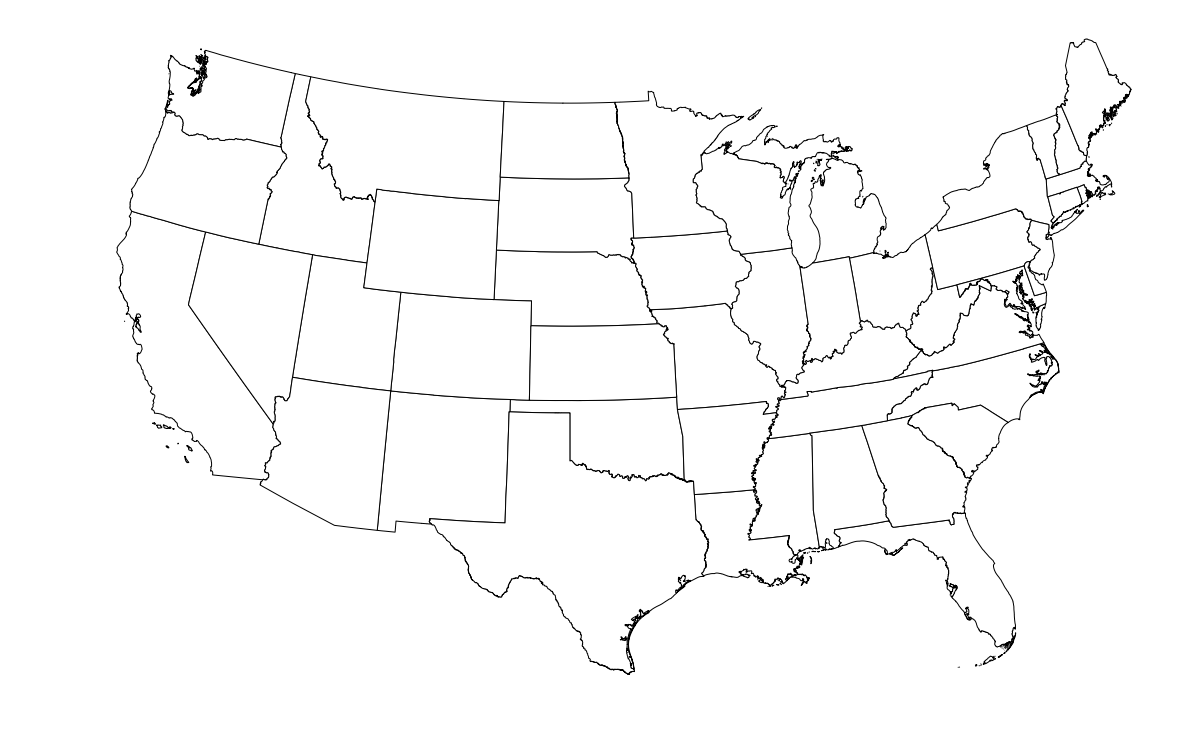

In [144]:
fig, ax = plt.subplots(figsize=(20,15))

delete_states = ['AK', 'AS', 'HI', 'PR', 'GU']
states_shape_cases  = states_shape_cases.loc[~states_shape_cases['STUSPS'].isin(delete_states)]
states_shape_cases = states_shape_cases.to_crs(epsg=2163)

states_shape_cases.plot(ax=ax, color='w', edgecolor='black')

# Insert comment here
plt.axis('off')

In [145]:
states_shape_cases['point'] = states_shape_cases['geometry'].centroid
state_points = states_shape_cases[['point', 'NAME', 'cases']]
state_points = state_points.set_geometry('point')
state_points['coords'] = state_points['point'].apply(lambda x: x.representative_point().coords[:])
state_points['coords'] = [state_points[0] for state_points in state_points['coords']]

In [146]:
state_points.head()

point            NAME  cases  \
0  POINT (968900.5142401541 -1302349.006773153)     Mississippi   3793   
1  POINT (1849270.427707764 -820703.8884651705)  North Carolina   5859   
2  POINT (227351.7828779383 -1041651.468761091)        Oklahoma   2465   
3  POINT (1846721.444074068 -594717.0352157739)        Virginia   7491   
4  POINT (1666480.709214782 -511066.3749840383)   West Virginia    776   

                                     coords  
0  (968900.5142401541, -1302349.0067731533)  
1  (1849270.4277077643, -820703.8884651705)  
2  (227351.7828779383, -1041651.4687610908)  
3  (1846721.4440740685, -594717.0352157739)  
4   (1666480.709214782, -511066.3749840383)

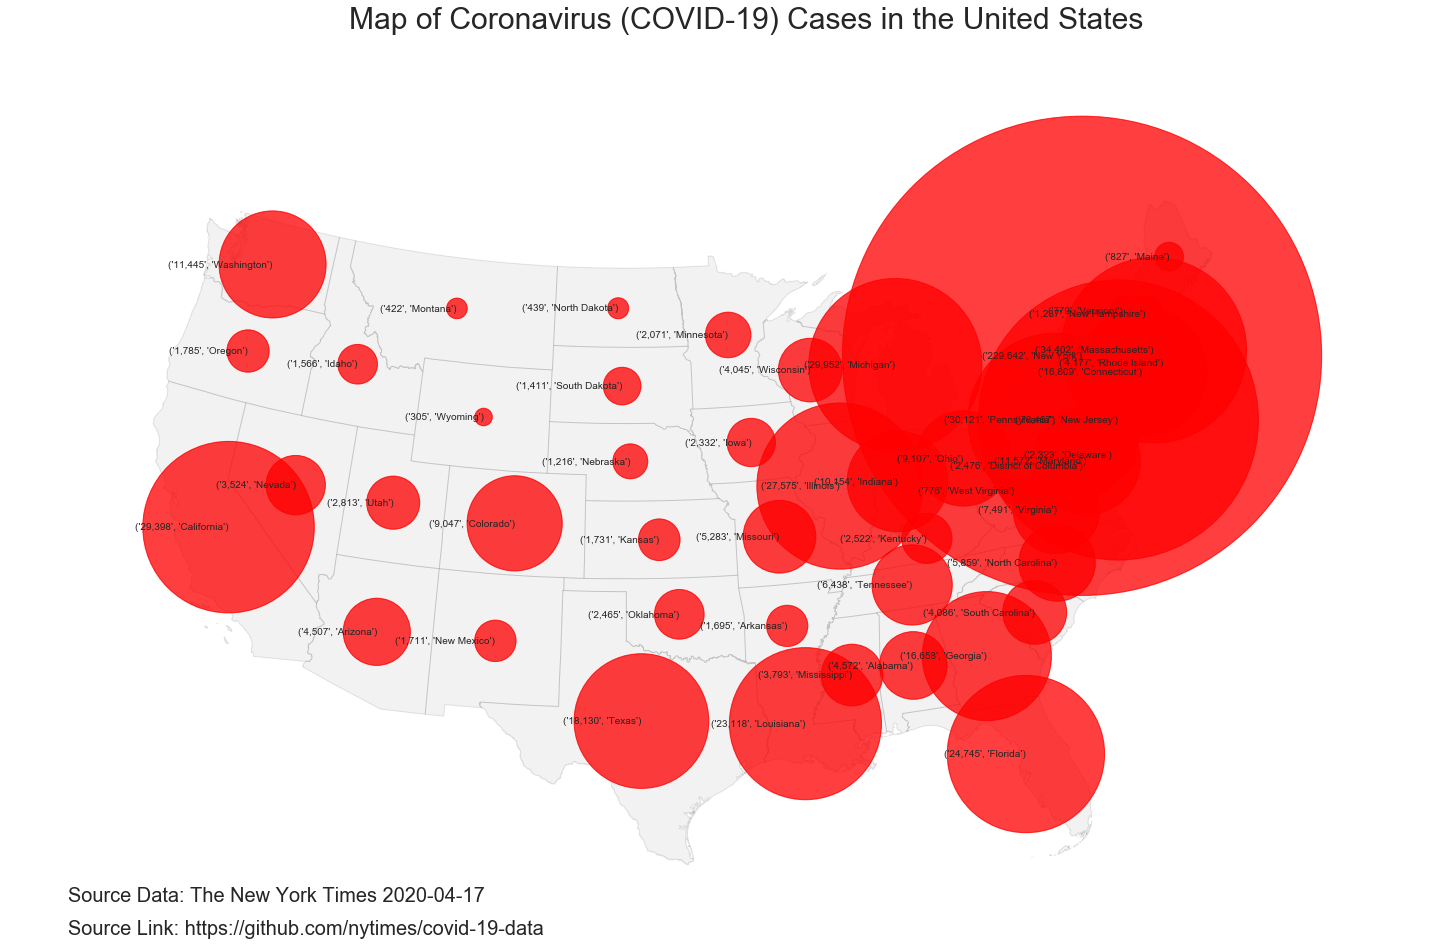

In [147]:
fig, ax = plt.subplots(figsize=(20,15))

states_shape_cases.plot(ax=ax, color='gray', edgecolor='black', alpha=.1)
state_points.plot(ax=ax, color='red', markersize=state_points['cases'], alpha=.5)

state_points.plot(ax=ax, color='red', markersize=state_points['cases'], alpha=.5)
for idx, row in state_points.iterrows():
    plt.annotate(s=('{:,}'.format(row['cases']), row['NAME']), xy=row['coords'],
                 horizontalalignment='right', va='center')
    
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
plt.figtext(0.05, 0.1, txt, wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.05, 0.07, txt2, wrap=True, horizontalalignment='left', fontsize=20)

ax.set_title('Map of Coronavirus (COVID-19) Cases in the United States', fontsize=30)
plt.axis('off')
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-state-map')

In [148]:
# # defining our plot
# plt.subplots(figsize=(20,15))
# ax = plt.subplot()

# fig = states_shape_cases.plot(column=("cases"), ax=ax, k=7, 
#                    scheme='fisher_jenks', label=True, legend=True, 
#                    legend_kwds={'loc': 'lower left', 'title': 'Number of COVID-19 Cases', 
#                    'title_fontsize': 'x-large','fontsize': 'x-large'}, 
#                    cmap='viridis', edgecolor='black')

# ax.set_title("Map of Number of Coronavirus (COVID-19) Cases in the United State by State", fontsize=30)
# txt = ('Source Data: The New York Times ' + current_date)
# txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
# txt3 = ('Choropleth Sheme: fisher_jenks')
# plt.figtext(0.2, 0.145, txt, wrap=True, horizontalalignment='left', fontsize=15)
# plt.figtext(0.2, 0.115, txt2, wrap=True, horizontalalignment='left', fontsize=15)
# plt.figtext(0.2, 0.175, txt3, wrap=True, horizontalalignment='left', fontsize=15)

# leg = fig.get_legend()
# leg._loc = 3

# for lbl in leg.get_texts():
#     label_text = lbl.get_text()
#     lower = label_text.split()[0]
#     upper = label_text.split()[2]
#     new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
#     lbl.set_text(new_text)

# plt.axis('off')
# plt.tight_layout()
# plt.savefig('figures/nyt-covid-19-data-state-map-choro')

In [149]:
covid_19_state_data.to_csv('data/us-states-raw-data.csv', index=False)
g.to_csv('data/us-states-grouped-day.csv')
bar.to_csv('data/us-states-grouped-states.csv')